### Daniele Pelizan

# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

## Importing necessary libraries and data

In [1]:
# To help in making the Python code more structured automatically
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns

sns.set(color_codes=True)  # adds a nice background to the graphs

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)


# Libraries to split data, impute missing values
from sklearn.model_selection import train_test_split

# Libraries to import decision tree classifier and different ensemble classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import StackingClassifier

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    plot_confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    make_scorer,
)

<IPython.core.display.Javascript object>

## Data Overview

- Observations
- Sanity checks

### Read the dataset

In [2]:
visa = pd.read_csv("EasyVisa.csv")

<IPython.core.display.Javascript object>

In [3]:
# copying data to another varaible to avoid any changes to original data
df = visa.copy()

<IPython.core.display.Javascript object>

### View the first and last 5 rows of the dataset

In [4]:
df.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

In [5]:
df.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


<IPython.core.display.Javascript object>

* The target variable `case_status` is a categorical with two classes: Certified and Denied. We need to replace this classe with 1 and 0 respectively (since we want to predict which visa is likely to be certified this is the class that will be equal to 1).
* We are going to check if `case_id` is the unique identifier of each booking. If so, we are going to drop it from our data set.
* `prevailing_wage` is the wage of the occupation, and it can be an hourly, weekly, monthly or yearly wage. We are going to check in the the EDA if some treatment of this variable is necessary.

### Understand the shape of the dataset

In [6]:
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns.")

The data has 25480 rows and 12 columns.


<IPython.core.display.Javascript object>

### Checking for duplicate values

In [7]:
df[df.duplicated()].count()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

* There are not duplicate values in the data set.

### Checking for missing values

In [8]:
df.isnull().sum()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

<IPython.core.display.Javascript object>

* There are no missing values in the data.

### Checking the data types of the columns

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


<IPython.core.display.Javascript object>

* `no_of_employees` and `yr_of_estab` are int64 data-types. `prevailing_wage` is float64 data-type.
* Nine features are object data-types. We need to convert these into suitable data-type before we feed our data into the model.

### Lets convert the columns with an 'object' datatype into categorical variables

In [10]:
for feature in df.columns:  # Loop through all columns in the dataframe
    if df[feature].dtype == "object":
        df[feature] = pd.Categorical(df[feature])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


<IPython.core.display.Javascript object>

* The columns  `case_id`, `continent`, `education_of_employee`, `has_job_experience`, `requires_job_training`, `region_of_employment`, `unit_of_wage`, `full_time_position` and `case_status` are **category** data-types now.

### Dropping case_id

In [11]:
# Checking how many unique values we have in case_id
df["case_id"].nunique()

25480

<IPython.core.display.Javascript object>

In [12]:
## case_id is the unique identifier of each visa applicant and will not add value to the model
# so we are going to drop it from our data set
df = df.drop("case_id", axis=1)

<IPython.core.display.Javascript object>

In [13]:
df.head()

,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


<IPython.core.display.Javascript object>

### Summary of the dataset

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


<IPython.core.display.Javascript object>

* The companies have in average 5667 employees. There are some negatives values in `no_of_employees` that we are going to investigate. 75% of the companies have at least 3504 employees, but there might be outliers as there is a big difference in the 3rd quartile and maximum values (600 thousand employees). 
* There are very old companies, established in the 1800, as new companies established in 2016.
* The average wage is 74455, but since we have various units of wage in the same feature it's better to analyse it on the EDA, separating the wage by its unit.

In [15]:
df.describe(include="category").T

,count,unique,top,freq
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


<IPython.core.display.Javascript object>

In [16]:
cat_columns = df.select_dtypes(include="category").columns.tolist()
for i in cat_columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts(dropna=False))
    print("*" * 50)

Unique values in continent are :
Asia             16861
Europe            3732
North America     3292
South America      852
Africa             551
Oceania            192
Name: continent, dtype: int64
**************************************************
Unique values in education_of_employee are :
Bachelor's     10234
Master's        9634
High School     3420
Doctorate       2192
Name: education_of_employee, dtype: int64
**************************************************
Unique values in has_job_experience are :
Y    14802
N    10678
Name: has_job_experience, dtype: int64
**************************************************
Unique values in requires_job_training are :
N    22525
Y     2955
Name: requires_job_training, dtype: int64
**************************************************
Unique values in region_of_employment are :
Northeast    7195
South        7017
West         6586
Midwest      4307
Island        375
Name: region_of_employment, dtype: int64
*************************************

<IPython.core.display.Javascript object>

* There are 6 continents, and the majority of the applicants are from Asia.
* There are 4 education levels, and a good part of the applicants have a Bachelor's degree. The minimum education level of the applicants is High School.
* A big part of the applicants have no job experience.
* The majority of the applicants don't require a job training.
* There are 5 regions of employment, and the Northeast region has the biggest number of applicantions, but not so different from the South or West.
* The majority of the wages are reported as yearly wages.
* The majority of the positions are for full-time jobs.
* Most of the visas are certified.

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

2. How does the visa status vary across different continents? 
 
3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 
 
4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 
 
5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

## Univariate analysis

In [17]:
# For numerical variables we want to study the dispersion and central tendency
# For this purpose we are going to plot histograms and box plots
# We are going to create a function that generates the plots
# This function takes the numerical variable as the input


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """

    # Using the function fig, ax = plt.subplots() to create 2 subplots
    # The subplots will be on top of each other: nrows = 2
    # The subplots will share the x-axis: sharex = True
    # The first subplot, ax_box2, will have 25% of the figure size: gridspec_kw={'height_ratios':(0.25, 0.75)}
    # The second subplot, ax_hist2, will have 75% of the figure size: gridspec_kw={'height_ratios':(0.25, 0.75)}

    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Creating the boxplot in the first subplot ax_box2, with the mean value displayed as a triangle (showmeans=True)
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="red")

    # Creating an histogram in the second subplot ax_hist2
    # with an specificied number of bins if it was given in the function
    if bins:
        sns.histplot(
            data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="blue"
        )
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="blue")

    # Add mean to the histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--", label="Mean")
    # Add median to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-", label="Median"
    )
    # Add a legend to the histogram and position it outside the plot
    ax_hist2.legend(bbox_to_anchor=(1, 1))

<IPython.core.display.Javascript object>

### no_of_employees - number of employees

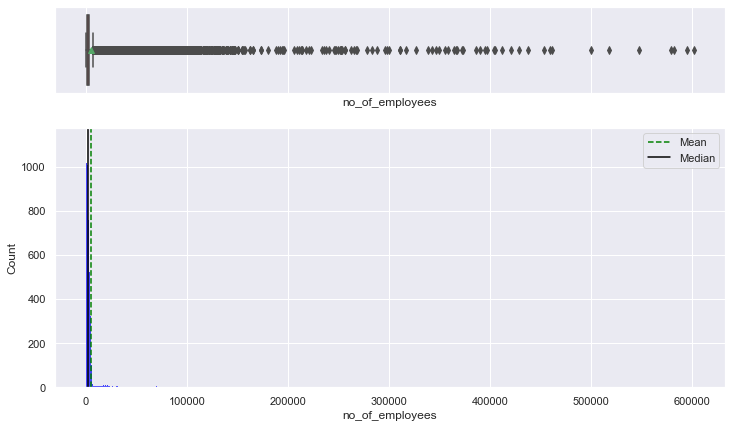

<IPython.core.display.Javascript object>

In [18]:
histogram_boxplot(df, "no_of_employees")

* The distribution of the number of employees is highly right skewed, with a lot of outliers. 
* The majority of the companies has less than five thousand employees, but there are some big companies with more than 100 thousand employees.

In [19]:
# Checking how many entries with negative number of employees
print(
    "The number of entries with negative number of employees is ",
    [df["no_of_employees"] <= 0][0].sum(),
)

The number of entries with negative number of employees is  33


<IPython.core.display.Javascript object>

In [20]:
# Since we have only 33 entries between 25480 entries, we assume this was an entry error
# We are going to change this negative values for its positive

df["no_of_employees"] = abs(df["no_of_employees"])

<IPython.core.display.Javascript object>

In [21]:
[df["no_of_employees"] <= 0][0].sum()

0

<IPython.core.display.Javascript object>

* Now we don't have negative number of employees

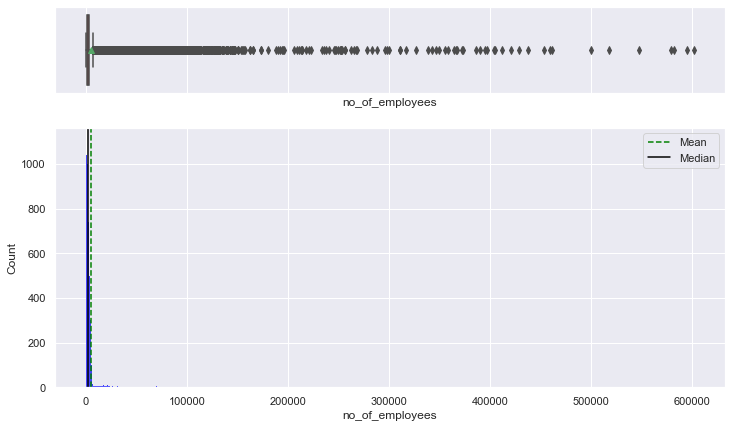

<IPython.core.display.Javascript object>

In [22]:
histogram_boxplot(df, "no_of_employees")

### yr_of_estab - year company was established

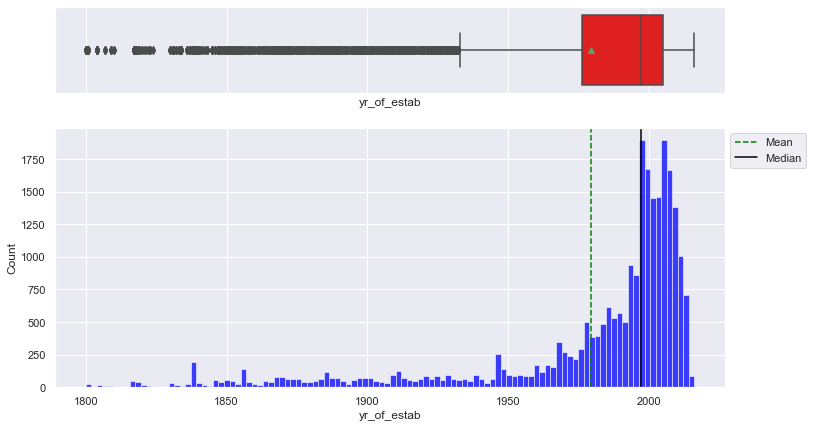

<IPython.core.display.Javascript object>

In [23]:
histogram_boxplot(df, "yr_of_estab")

* There are companies there were established in the 18 hundreds until the 2 thousands.
* A great number of applicants are from companies established in the 2 thousands.

### prevailing_wage - Average wage paid

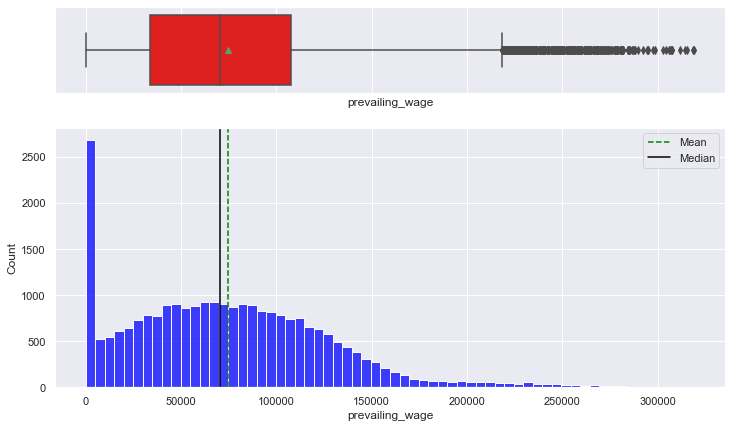

<IPython.core.display.Javascript object>

In [24]:
histogram_boxplot(df, "prevailing_wage")

* The distribution of the average wage paid have a bell shape, almost normal. It is right skewed, with some companies paying 300 thousand perhaps to some high positions as VPs, CEOs.
* There are around 2700 jobs that are paying very low, in the hundreds. This are the jobs paid by hour.
* In this distribution we have wages in year, month, week and hour.

#### Average wage paid by hour

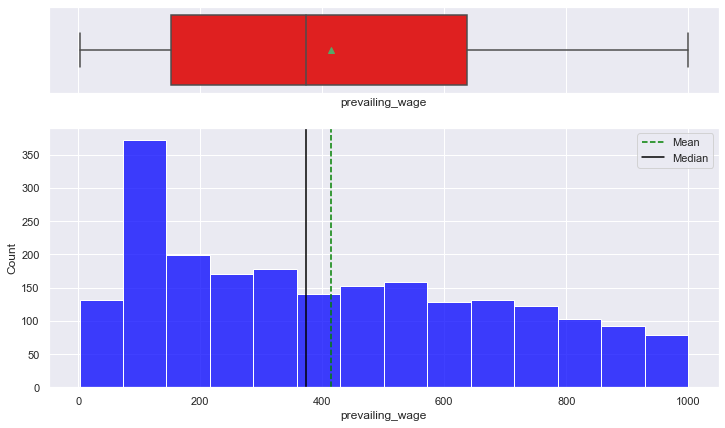

<IPython.core.display.Javascript object>

In [25]:
histogram_boxplot(data=df[df["unit_of_wage"] == "Hour"], feature="prevailing_wage")

* The average wage by hour is 420.
* Some of this wage by hour can be internship positions for example, where the intern works some few hours per week. Since we don't know how many hour a week this applicant is going to work, we are not goint to transform hour to year wage.

#### Average wage paid by week.

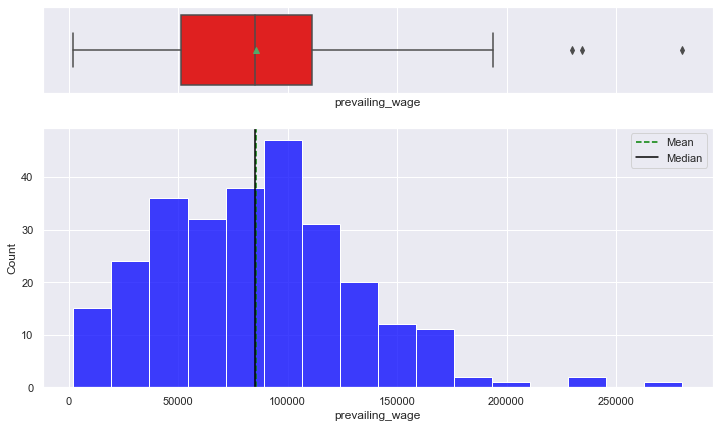

<IPython.core.display.Javascript object>

In [26]:
histogram_boxplot(data=df[df["unit_of_wage"] == "Week"], feature="prevailing_wage")

* The average wage by week is around 80,000, which is a very high wage. Perhaps this is very niche special job, done in some few weeks, since there are few applicants in this category. It can be modeling, acting, photographing, giving a lecture in a conference for example.
* Since we don't know how many weeks this applicant is going to work, we are not going to transform week to year wage.

#### Average wage paid by month.

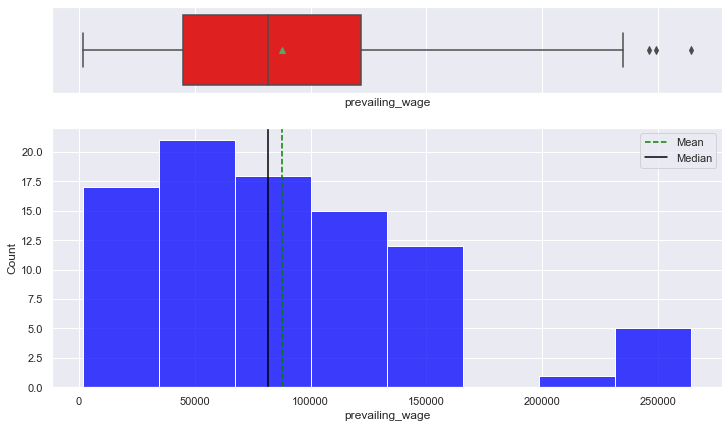

<IPython.core.display.Javascript object>

In [27]:
histogram_boxplot(data=df[df["unit_of_wage"] == "Month"], feature="prevailing_wage")

* The average wage by month is around 80,000, which is a very high wage. Again this can be a very specific job executed by a highly capacitate person, or a person with a very specific trait. And it can be a very short time job. It can be an actor shooting for a movie for example, or a board member of a company that works few months a year.
* There are very few applicants in this category.
* Since we don't know how many months this applicant is going to work, we are not going to transform month to year wage.

#### Average wage paid by year.

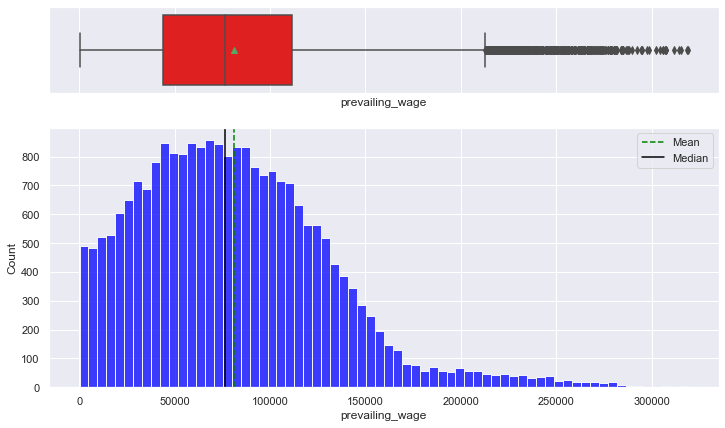

<IPython.core.display.Javascript object>

In [28]:
histogram_boxplot(data=df[df["unit_of_wage"] == "Year"], feature="prevailing_wage")

* The average wage paid by year is around 85,000, and the majority of the applicants are in this category.

In [29]:
# For categorical variables we want to study the number of observations in each category
# For this purpose we are going to plot a bar graph using the countplot function
# We are going to create a function that generates the plots
# This function takes the categorical variable as the input
# The bars will be labeled with the number of observations
# For the argument perc=True the bar will be labeled with the percentage of observations
# For the argument n= any integer number, the plot will have the n bars with the biggest number of obervations


def labeled_barplot(data, feature, perc=False, n=None):

    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column - number of rows in that column
    count = data[feature].nunique()  # nunique is number of unique values

    # Determining the figure size considering the number of bars
    if n is None:
        plt.figure(
            figsize=(count + 2, 7)
        )  # count+1 :the number of bars that we have + 1
    else:
        plt.figure(figsize=(n + 2, 7))  # n+1: number of bars that we want + 1

    plt.xticks(rotation=90, fontsize=15)  # Rotating the x axis labels

    # Creating the bar plot with a variable ax assigned to our plot. Then latter we can make manipulatios in this plot.
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    # Iterating over the bars one-by-one using the patches function to count the number of bars
    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # calculating the percentage of each class of the category
        else:
            label = p.get_height()  # count of each class of the category

        # Get the x coordinate of the text by getting the width of the bar in which we are going to put our label
        x = p.get_x() + p.get_width() / 2

        # Get the y coordinate of the text by getting the height of the bar
        y = p.get_height()

        # Writing our label in the x,y coordinates over the bar,
        # and leave some space between the label and the boundary of the bar (xytext)
        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )

    plt.show()  # Show the plot

<IPython.core.display.Javascript object>

### continent of the employee

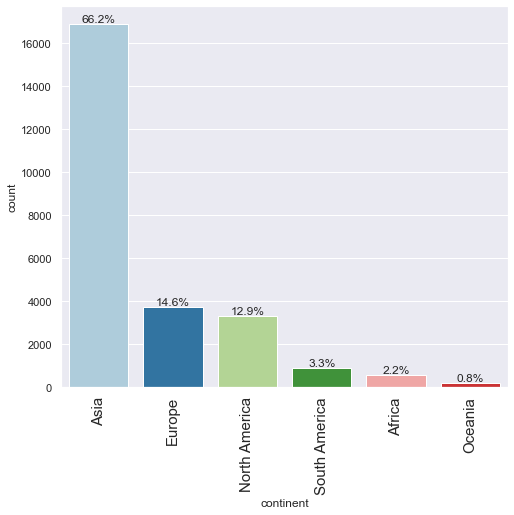

<IPython.core.display.Javascript object>

In [30]:
labeled_barplot(df, "continent", perc=True)

* 66% of the applicants are from Asia, followed by 14% from Europe.

### education_of_employee

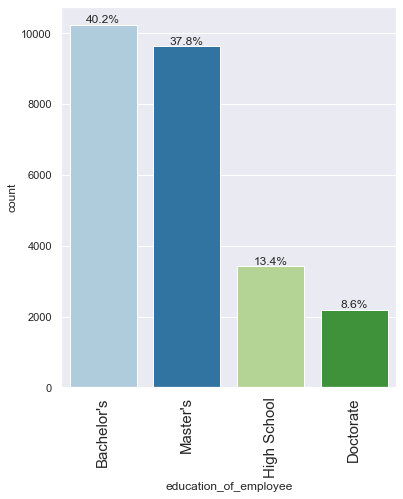

<IPython.core.display.Javascript object>

In [31]:
labeled_barplot(df, "education_of_employee", perc=True)

* The majority of the applicants have a bachelor's or master's degree, 40% and 37% respectively.
* Only 8% of the applicants have a Doctorate.

### has_job_experience

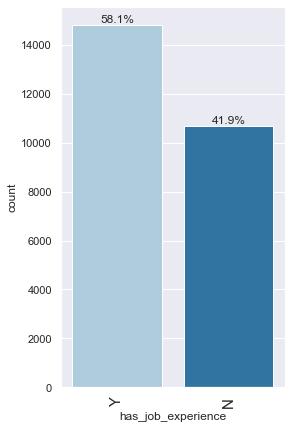

<IPython.core.display.Javascript object>

In [32]:
labeled_barplot(df, "has_job_experience", perc=True)

* 58% of the applicants have job experience and 42% don't have.

### requires_job_training

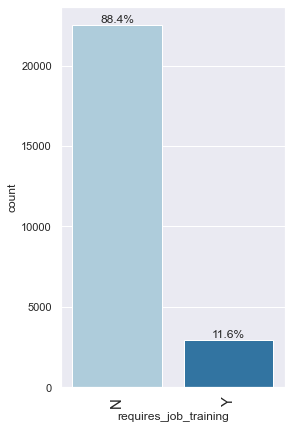

<IPython.core.display.Javascript object>

In [33]:
labeled_barplot(df, "requires_job_training", perc=True)

* 88% of the applicants don't require job training.
* 12% of the applicants require job training.

### yr_of_estab - year of established

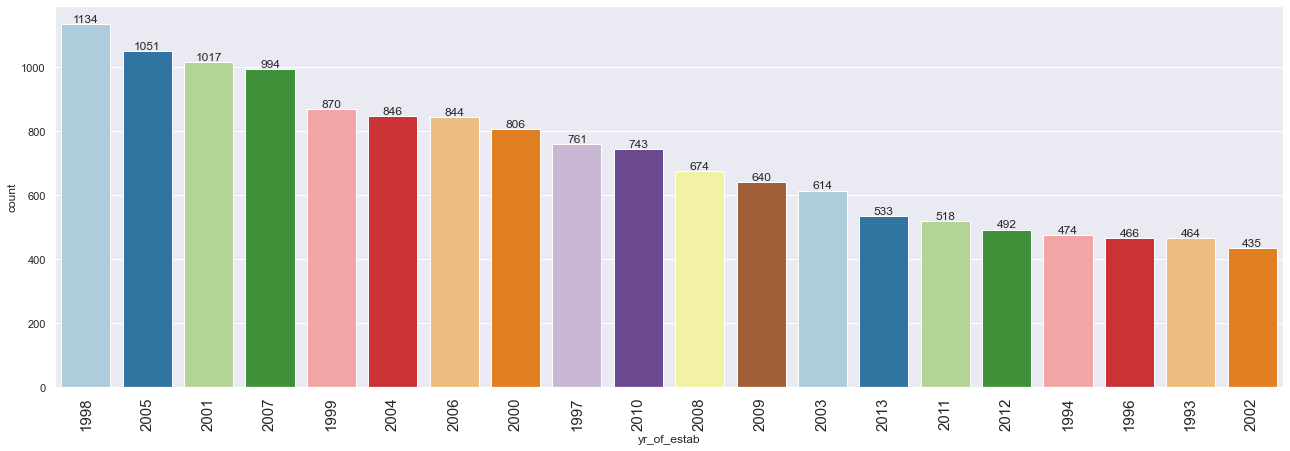

<IPython.core.display.Javascript object>

In [34]:
labeled_barplot(df, "yr_of_estab", n=20)

* The companies with the biggest number of applications were established in the the end of the 90's and beggining of 2000's.

### region_of_employment

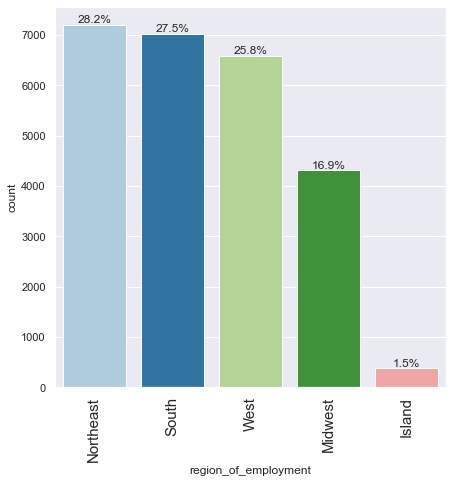

<IPython.core.display.Javascript object>

In [35]:
labeled_barplot(df, "region_of_employment", perc=True)

* Almost the same number of applicants are going to be employed in the Northeast, South and West: 28%, 27% and 26% respectively.
* Only 1.5% of the applicants are going to the Island.

### unit_of_wage

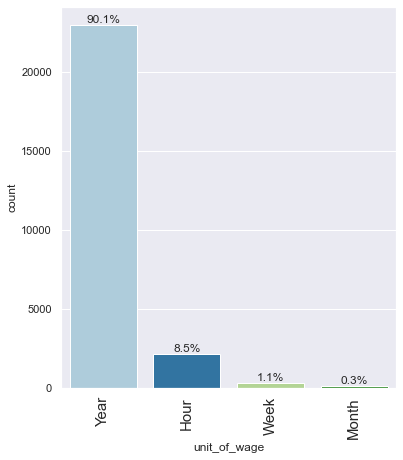

<IPython.core.display.Javascript object>

In [36]:
labeled_barplot(df, "unit_of_wage", perc=True)

* 90% of the applicants have a yearly wage, followed by 8.5% with an hourly wage.
* Only 1.1% and 0.3% of the applicants have a weekly or monthly wage.

### full_time_position

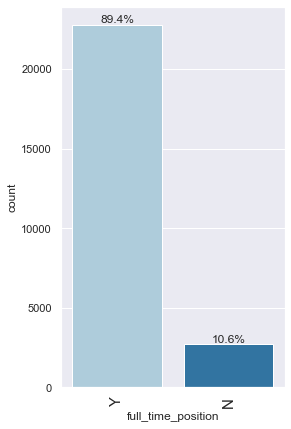

<IPython.core.display.Javascript object>

In [37]:
labeled_barplot(df, "full_time_position", perc=True)

* 89% of the applications are for a full-time position.
* 11% of the applications are for a part-time position.

### case_status - target variable - Visa was certified or denied

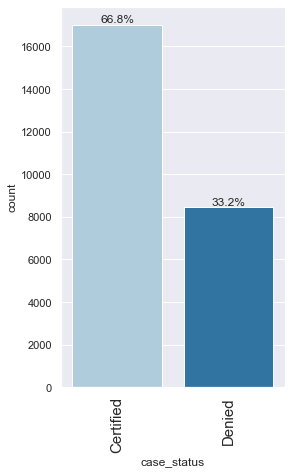

<IPython.core.display.Javascript object>

In [38]:
labeled_barplot(df, "case_status", perc=True)

* 67% of the applicants have the Visa certified.
* 33% of the applicants have the visa denied.

#### case_status is our target variable, and we are going to encode Denied as 0 and Certified as 1, as we want to predict which Visa is likely to be certified.

We are doing the encoding now for further analysis.

In [39]:
df["case_status"] = df["case_status"].apply(lambda x: 1 if x == "Certified" else 0)

<IPython.core.display.Javascript object>

### Bivariate analysis

Let's check the correlation between the numerical variables.

corr < -0.7 or corr > 0.7 indicates highly correlated attributes (strong linear dependence)

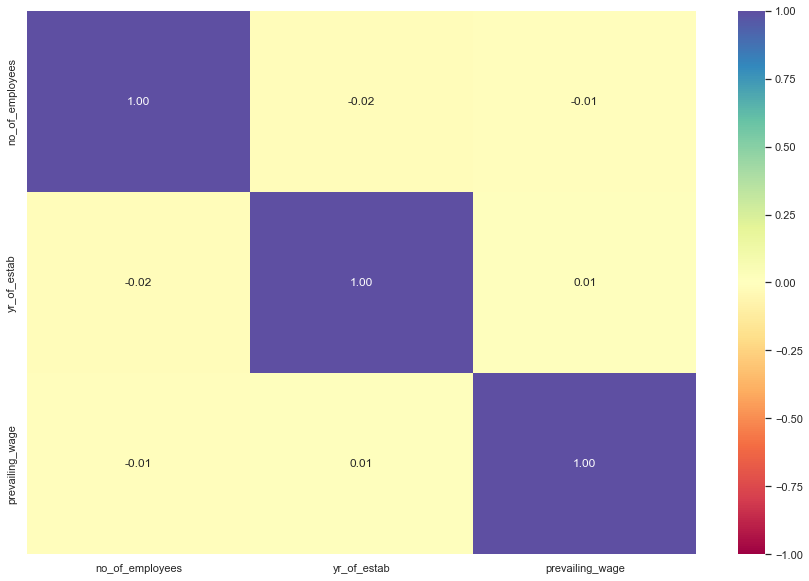

<IPython.core.display.Javascript object>

In [40]:
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* The numerical variables are not correlated.

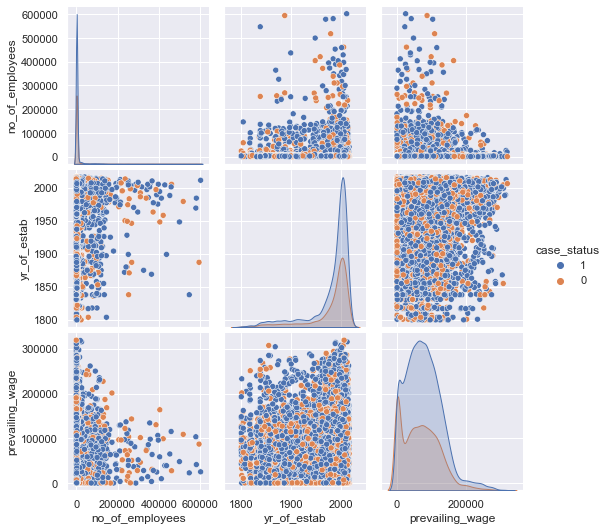

<IPython.core.display.Javascript object>

In [41]:
sns.pairplot(data=df, hue="case_status")
plt.show()

* The distribution plots on diagonals for Class 0 and 1 overlap. Let's explore this further using other plots.

Let's create functions that will help us plot two features

In [42]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### case_status and no_of_employees

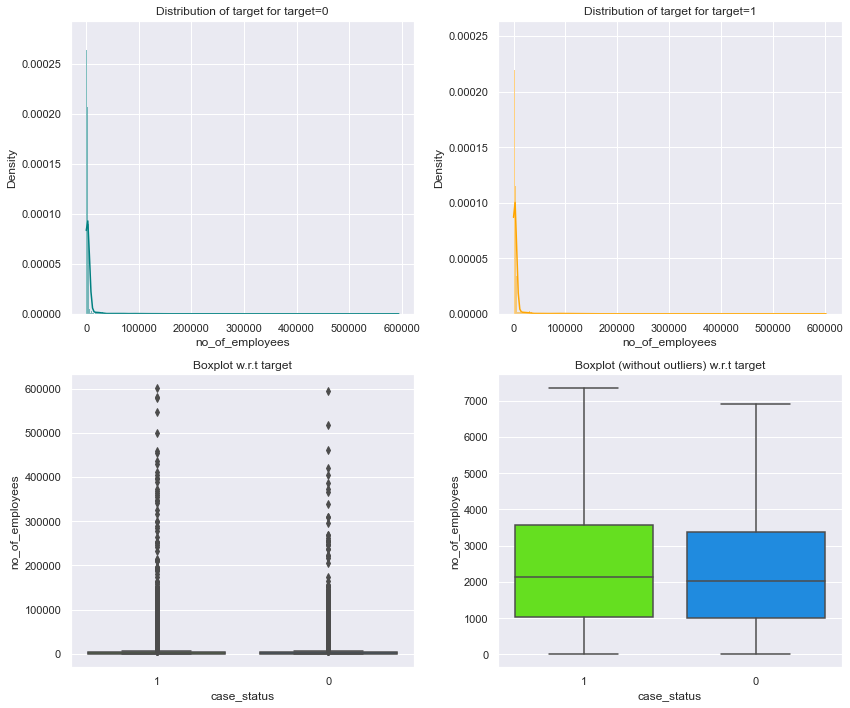

<IPython.core.display.Javascript object>

In [43]:
distribution_plot_wrt_target(df, "no_of_employees", "case_status")

* The distribution of number of employees in the company for Denied and Certified Visa is very similar.
* The median number of employees is slightly higher for Visas that are Certified.

### case_status and yr_of_estab - year of established

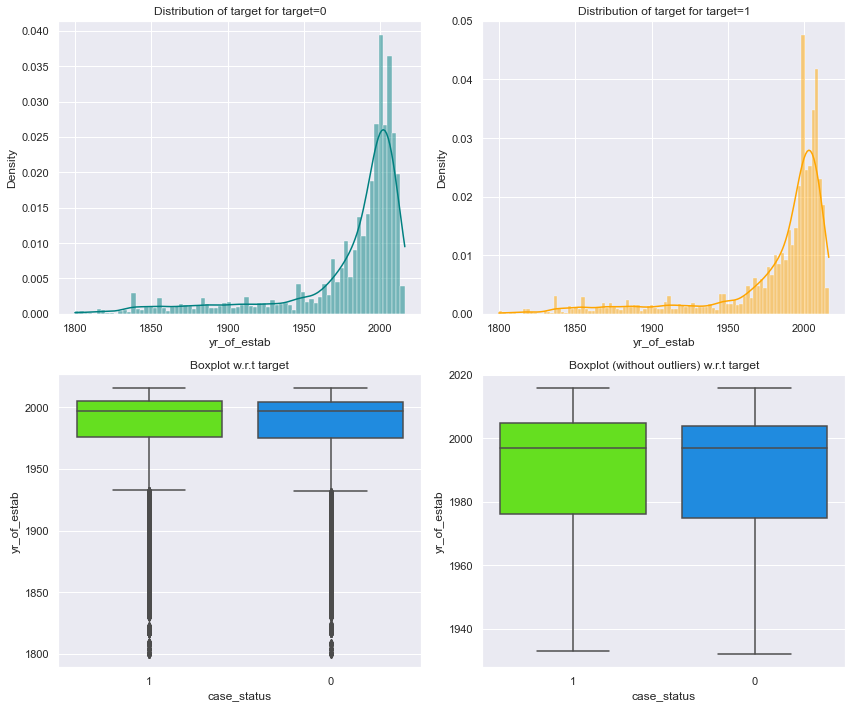

<IPython.core.display.Javascript object>

In [44]:
distribution_plot_wrt_target(df, "yr_of_estab", "case_status")

* The distribution of year in which the company was established is very similar for Visas Certified and Denied.

### case_status and prevailing_wage

5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?

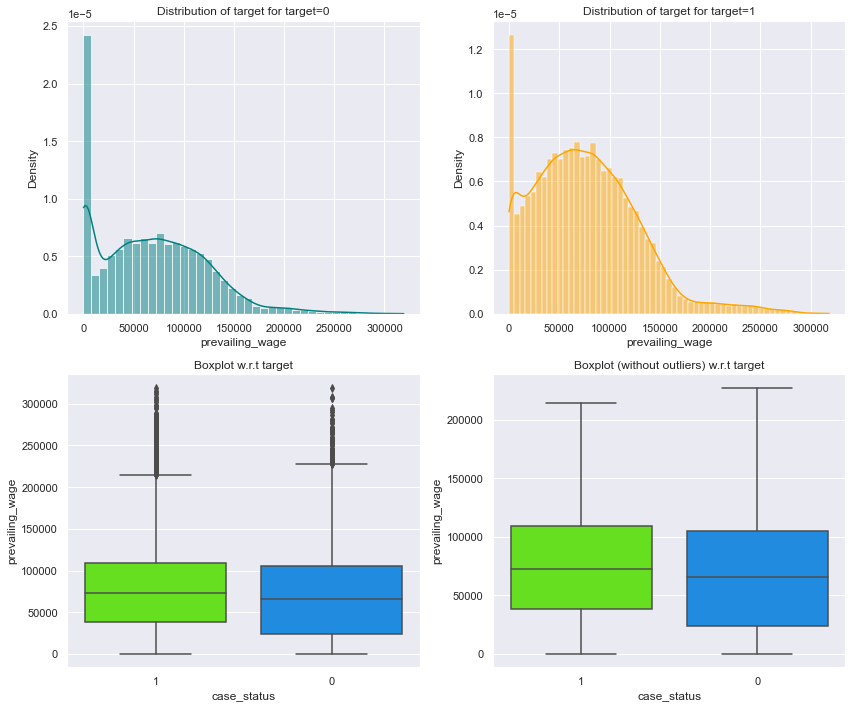

<IPython.core.display.Javascript object>

In [45]:
distribution_plot_wrt_target(df, "prevailing_wage", "case_status")

* The median and the second and third quartiles of wage are slightly higher for Visas that are Certified.

In [46]:
# Let's create a defined function to plot a crosstab of two categorical variables


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )

    print(tab)

    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

<IPython.core.display.Javascript object>

### case_status and continent

2. How does the visa status vary across different continents? 

case_status        1     0    All
continent                        
All            17018  8462  25480
Asia           11012  5849  16861
North America   2037  1255   3292
Europe          2957   775   3732
South America    493   359    852
Africa           397   154    551
Oceania          122    70    192
------------------------------------------------------------------------------------------------------------------------
case_status           1         0
continent                        
South America  0.578638  0.421362
North America  0.618773  0.381227
Oceania        0.635417  0.364583
Asia           0.653105  0.346895
Africa         0.720508  0.279492
Europe         0.792337  0.207663


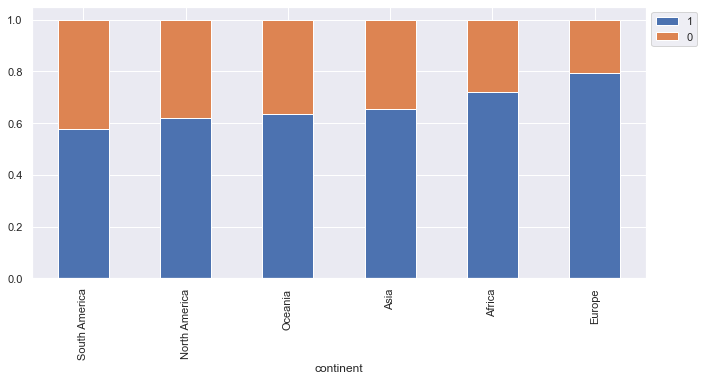

<IPython.core.display.Javascript object>

In [47]:
stacked_barplot(df, "continent", "case_status")

* The Europe applicants have the highest aproved Visa rate. The South America applicants have the lowest aproved Visa rate.
* 80% of the Europe applicants have a Visa Certified.
* 72% of the Africa applicants have a Visa Certified.
* 65% of the Asia applicants have a Visa Certified.
* 63% of the Oceania applicants have a Visa Certified.
* 61% of the North America applicants have a Visa Certified.
* 58% of the South America applicants have a Visa Certified.

### case_status and education_of_employee

1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification? 

case_status                1     0    All
education_of_employee                    
All                    17018  8462  25480
Bachelor's              6367  3867  10234
High School             1164  2256   3420
Master's                7575  2059   9634
Doctorate               1912   280   2192
------------------------------------------------------------------------------------------------------------------------
case_status                   1         0
education_of_employee                    
High School            0.340351  0.659649
Bachelor's             0.622142  0.377858
Master's               0.786278  0.213722
Doctorate              0.872263  0.127737


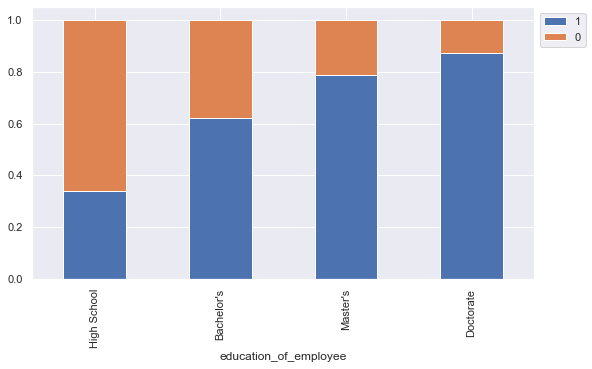

<IPython.core.display.Javascript object>

In [48]:
stacked_barplot(df, "education_of_employee", "case_status")

* The Certified Visa rate is higher for the applicants with higher education.
* 87% of the applicants with Doctorate have a Visa Certified.
* 78% of the applicants with Master degree have a Visa Certified.
* 62% of the applicants with Bachelor degree have a Visa Certified.
* Only 34% of the applicants with High School degree have a Visa Certified.

### case_status and has_job_experience

3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status? 

case_status             1     0    All
has_job_experience                    
All                 17018  8462  25480
N                    5994  4684  10678
Y                   11024  3778  14802
------------------------------------------------------------------------------------------------------------------------
case_status                1         0
has_job_experience                    
N                   0.561341  0.438659
Y                   0.744764  0.255236


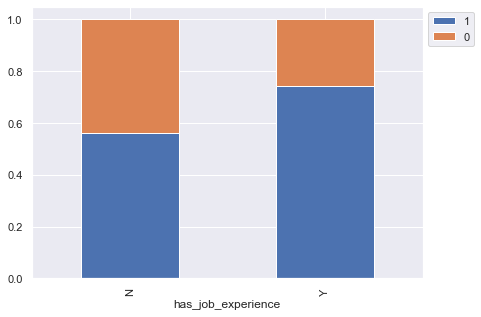

<IPython.core.display.Javascript object>

In [49]:
stacked_barplot(df, "has_job_experience", "case_status")

* The aproved Visa rate is higher for the applicants with job experience.
* 74% of the applicants with job experience have a Visa Certified.
* 56% of the applicants with no job experience have a Visa Certified.

### case_status and requires_job_training

case_status                1     0    All
requires_job_training                    
All                    17018  8462  25480
N                      15012  7513  22525
Y                       2006   949   2955
------------------------------------------------------------------------------------------------------------------------
case_status                   1         0
requires_job_training                    
N                      0.666459  0.333541
Y                      0.678849  0.321151


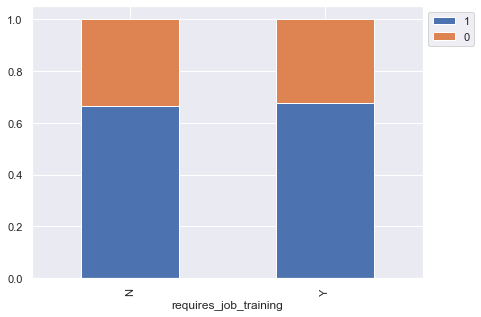

<IPython.core.display.Javascript object>

In [50]:
stacked_barplot(df, "requires_job_training", "case_status")

* There are no significative difference in the approved Visa rate between the applicants that require job tranining and the applicants that not require job training.

### case_status and region_of_employment

case_status               1     0    All
region_of_employment                    
All                   17018  8462  25480
Northeast              4526  2669   7195
West                   4100  2486   6586
South                  4913  2104   7017
Midwest                3253  1054   4307
Island                  226   149    375
------------------------------------------------------------------------------------------------------------------------
case_status                  1         0
region_of_employment                    
Island                0.602667  0.397333
West                  0.622533  0.377467
Northeast             0.629048  0.370952
South                 0.700157  0.299843
Midwest               0.755282  0.244718


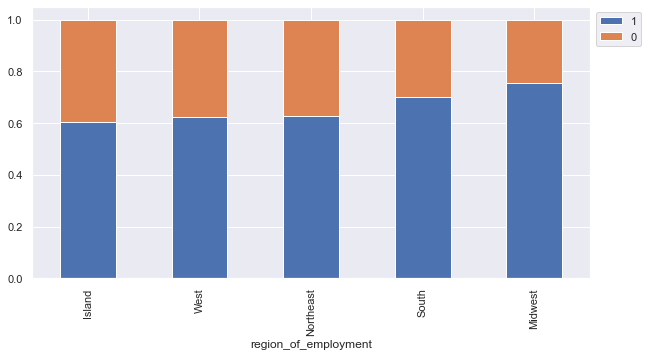

<IPython.core.display.Javascript object>

In [51]:
stacked_barplot(df, "region_of_employment", "case_status")

* The applicants that are going to work in the Midwest and South have a higher Certified Visa rate, 75% and 70% respectively.
* The applicants that are going to work in the Northeast, West and Island have a lower Certified Visa rate, around 60%.

### case_status and unit_of_wage

4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa? 

case_status       1     0    All
unit_of_wage                    
All           17018  8462  25480
Year          16047  6915  22962
Hour            747  1410   2157
Week            169   103    272
Month            55    34     89
------------------------------------------------------------------------------------------------------------------------
case_status          1         0
unit_of_wage                    
Hour          0.346314  0.653686
Month         0.617978  0.382022
Week          0.621324  0.378676
Year          0.698850  0.301150


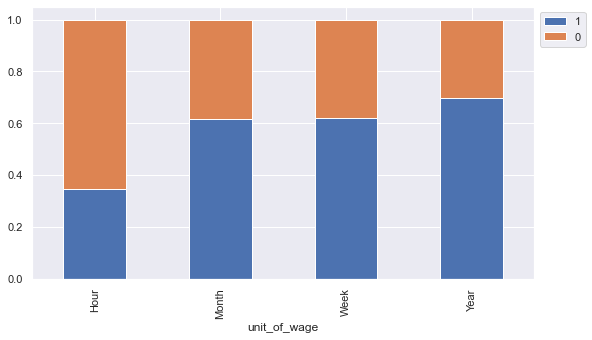

<IPython.core.display.Javascript object>

In [52]:
stacked_barplot(df, "unit_of_wage", "case_status")

* The Year pay unit is most likely to be certified for a Visa. 
* The Hour pay unit is less likely to be certified for a Visa.
* 69% of the applicants with Year pay unit have a Visa Certified.
* Around 61% of the applicants with Week and Month pay unit have a Visa Certified.
* Only 34% of the applicants with Hour pay unit have a Visa Certified.

### case_status and full_time_position

case_status             1     0    All
full_time_position                    
All                 17018  8462  25480
Y                   15163  7610  22773
N                    1855   852   2707
------------------------------------------------------------------------------------------------------------------------
case_status                1         0
full_time_position                    
Y                   0.665832  0.334168
N                   0.685260  0.314740


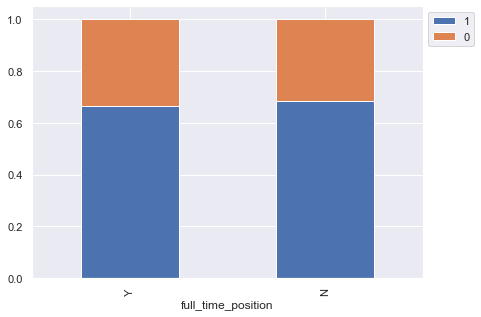

<IPython.core.display.Javascript object>

In [53]:
stacked_barplot(df, "full_time_position", "case_status")

* There is almost no difference in the rate of Certified Visa for the applicants with a full time position and the ones with part time position.

In [54]:
# Let's create a function to plot boxplots with the numeric and categorical variable

def boxplot_categorical(data, x, y, figure_size):
    """
    Boxplot 

    data: dataframe
    x: numerical variable
    y: categorical variable
    figure_size: size of the plot (n row, n column)
    The means are displayed as a star
    """
    
    plt.figure(figsize=figure_size)
    
    sns.boxplot(data=data, y=y, x=x, showmeans=True,
                showfliers=False,
                meanprops={"marker": "*", "markeredgecolor": "black", "markersize": "8"}, 
                order=data.groupby(y)[x].mean().sort_values(ascending=False).index)
    plt.show()


<IPython.core.display.Javascript object>

In [55]:
# Let's create a function to plot a heatmap of a crosstab of
# two categorical variables that have more than 2 categories each


def heatmap_crosstab(index, columns, figure_size):
    """
    Heatmap of a crosstab 

    index: categorical variable
    columns: categorical variable
    figure_size: size of the plot (n row, n column)
    
    """

    plt.figure(figsize=figure_size)

    plt.subplot(121)
    sns.heatmap(
        pd.crosstab(index, columns, normalize="columns"),
        annot=True,
        fmt=".4f",
        cmap="Spectral",
    )

    plt.show()

<IPython.core.display.Javascript object>

### continent and education_of_employee

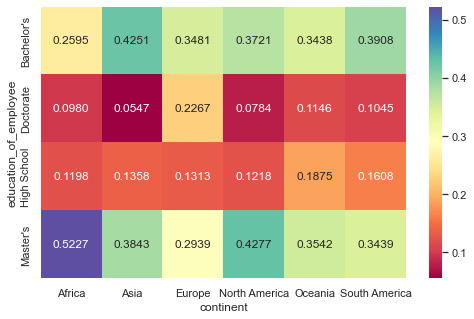

<IPython.core.display.Javascript object>

In [56]:
heatmap_crosstab(
    index=df["education_of_employee"], columns=df["continent"], figure_size=(18, 5),
)

* 52% of the applicants from Africa have a Master's degree, the highest rate between the continents.
* 42% of the applicants from Asia have a Bachelor's degree, the highest rate between the continents.
* 22% of the applicants from Europte have a Doctorate, the highest rate between the continents.
* 18% of the applicants from South America have only High School, the highest proportion between the continents.

### continent and has_job_experience

has_job_experience      N      Y    All
continent                              
All                 10678  14802  25480
Asia                 7071   9790  16861
Europe               1576   2156   3732
North America        1348   1944   3292
South America         377    475    852
Africa                217    334    551
Oceania                89    103    192
------------------------------------------------------------------------------------------------------------------------
has_job_experience         N         Y
continent                             
Oceania             0.463542  0.536458
South America       0.442488  0.557512
Europe              0.422294  0.577706
Asia                0.419370  0.580630
North America       0.409478  0.590522
Africa              0.393829  0.606171


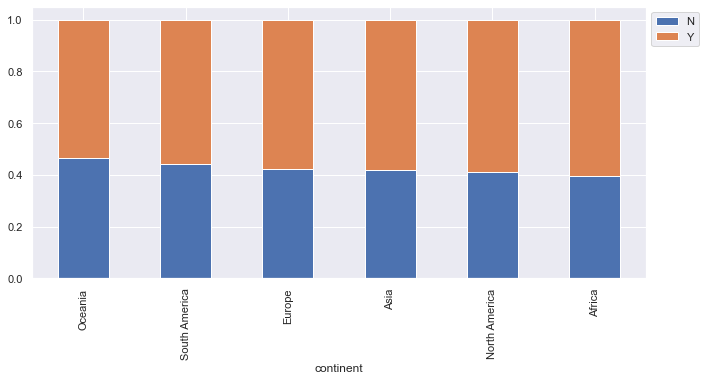

<IPython.core.display.Javascript object>

In [57]:
stacked_barplot(df, "continent", "has_job_experience")

* All the continents have almost the same rate  of applicants with job experience.

### continent and requires_job_training

requires_job_training      N     Y    All
continent                                
All                    22525  2955  25480
Asia                   15113  1748  16861
Europe                  2993   739   3732
North America           3044   248   3292
South America            702   150    852
Africa                   510    41    551
Oceania                  163    29    192
------------------------------------------------------------------------------------------------------------------------
requires_job_training         N         Y
continent                                
Europe                 0.801983  0.198017
South America          0.823944  0.176056
Oceania                0.848958  0.151042
Asia                   0.896329  0.103671
North America          0.924666  0.075334
Africa                 0.925590  0.074410


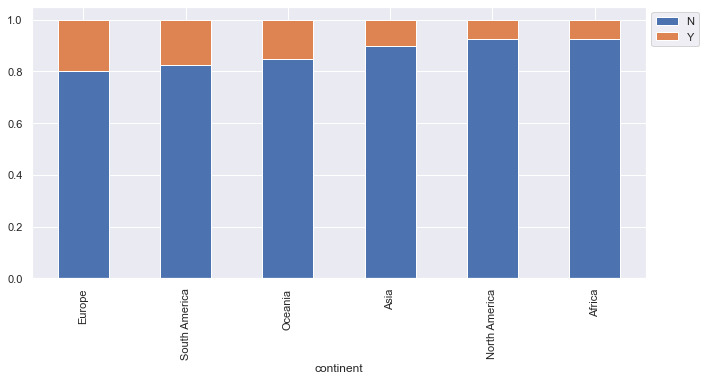

<IPython.core.display.Javascript object>

In [58]:
stacked_barplot(df, "continent", "requires_job_training")

* The applicants from Africa are the ones that require less job training.
* The applicants from Europe are the ones that require more job training.

### continent and region_of_employment

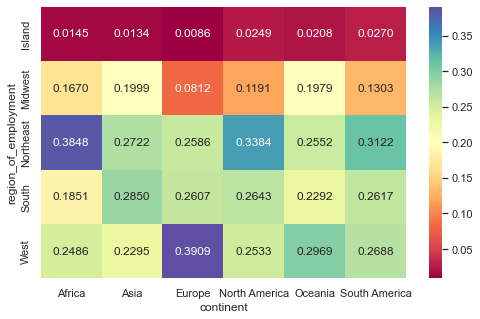

<IPython.core.display.Javascript object>

In [59]:
heatmap_crosstab(
    index=df["region_of_employment"], columns=df["continent"], figure_size=(18, 5),
)

* A great number of applicants from Africa, North America and South America goes to the Northeast.
* A great number of applicants from Europe goes to the Northeast.
* The applicants from Asia goes to the South and Northeast primarily.

### continent and prevailing_wage

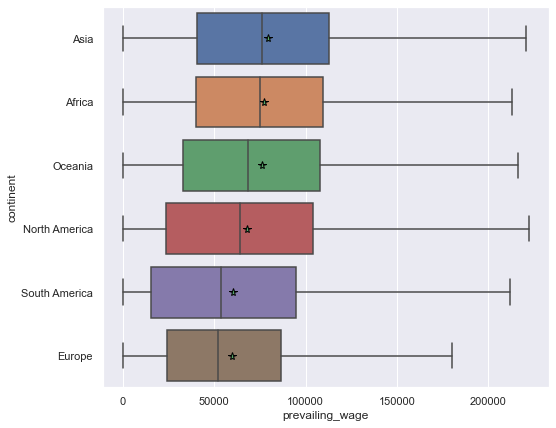

<IPython.core.display.Javascript object>

In [60]:
boxplot_categorical(df, "prevailing_wage", "continent", figure_size=(8, 7))

* The applicants from Asia have the higher wages, followed by the applicants from Africa.
* The applicants from Europe have the lower wages.

### education_of_employee and has_job_experience

has_job_experience         N      Y    All
education_of_employee                     
All                    10678  14802  25480
Bachelor's              4348   5886  10234
Master's                3993   5641   9634
High School             1396   2024   3420
Doctorate                941   1251   2192
------------------------------------------------------------------------------------------------------------------------
has_job_experience            N         Y
education_of_employee                    
Doctorate              0.429288  0.570712
Bachelor's             0.424858  0.575142
Master's               0.414470  0.585530
High School            0.408187  0.591813


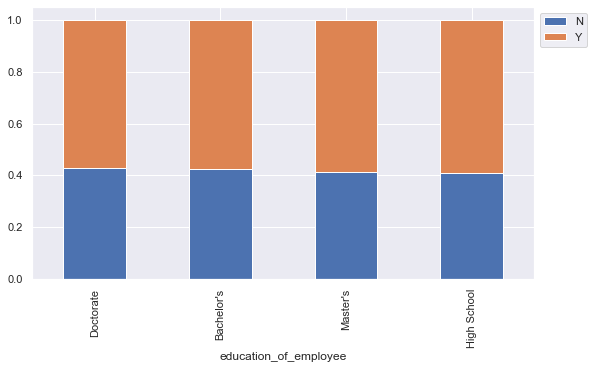

<IPython.core.display.Javascript object>

In [61]:
stacked_barplot(df, "education_of_employee", "has_job_experience")

* The same rate of applicants, around 60%, has job experience, independent of the education.

### education_of_employee and requires_job_training

requires_job_training      N     Y    All
education_of_employee                    
All                    22525  2955  25480
Bachelor's              8971  1263  10234
Master's                8786   848   9634
High School             2990   430   3420
Doctorate               1778   414   2192
------------------------------------------------------------------------------------------------------------------------
requires_job_training         N         Y
education_of_employee                    
Doctorate              0.811131  0.188869
High School            0.874269  0.125731
Bachelor's             0.876588  0.123412
Master's               0.911978  0.088022


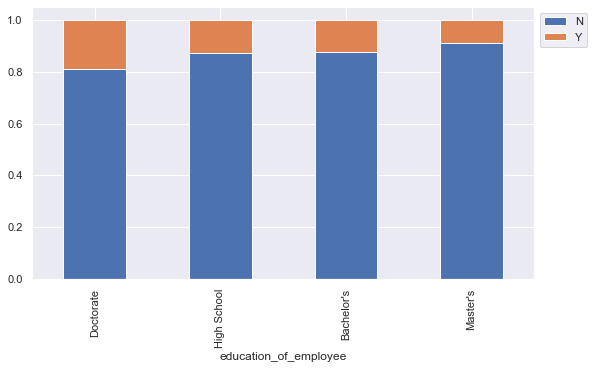

<IPython.core.display.Javascript object>

In [62]:
stacked_barplot(df, "education_of_employee", "requires_job_training")

* The applicants that have doctorate are the ones who require more job training.

### education_of_employee and region_of_employment

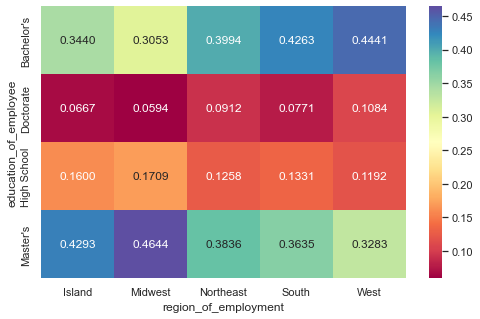

<IPython.core.display.Javascript object>

In [63]:
heatmap_crosstab(
    index=df["education_of_employee"],
    columns=df["region_of_employment"],
    figure_size=(18, 5),
)

* The Midwest and Island receive more applicants with Master's degree.
* The South and West receive more applicants with Bachelor's degree.

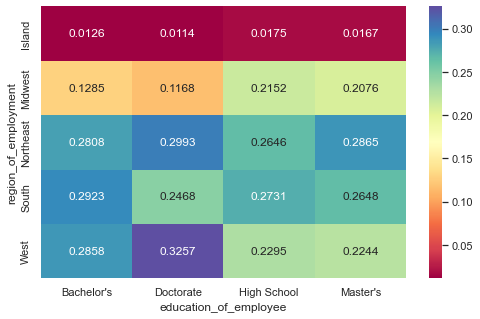

<IPython.core.display.Javascript object>

In [64]:
heatmap_crosstab(
    columns=df["education_of_employee"],
    index=df["region_of_employment"],
    figure_size=(18, 5),
)

* The higher proportion of applicants with Doctorate goes to the West.

### education_of_employee and prevailing_wage

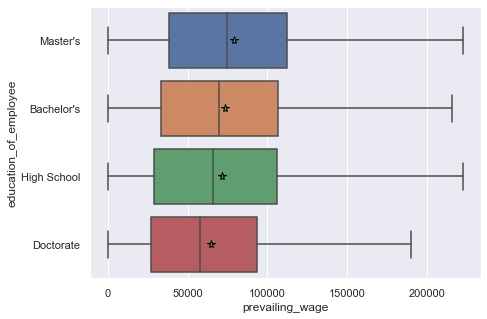

<IPython.core.display.Javascript object>

In [65]:
boxplot_categorical(df, "prevailing_wage", "education_of_employee", figure_size=(7, 5))

* The applicants with Master's degree have the highest wages.
* The applicants with Doctorate have the lower wages.

### has_job_experience and requires_job_training

requires_job_training      N     Y    All
has_job_experience                       
All                    22525  2955  25480
N                       8988  1690  10678
Y                      13537  1265  14802
------------------------------------------------------------------------------------------------------------------------
requires_job_training         N         Y
has_job_experience                       
N                      0.841731  0.158269
Y                      0.914539  0.085461


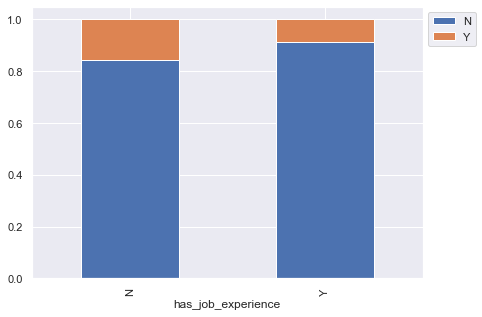

<IPython.core.display.Javascript object>

In [66]:
stacked_barplot(df, "has_job_experience", "requires_job_training")

* The applicants that have job experience require less job training.

### has_job_experience and prevailing_wage

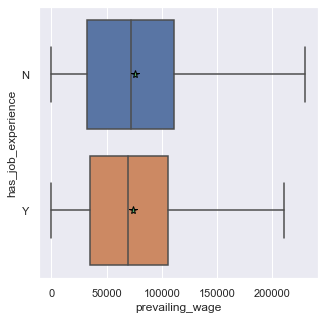

<IPython.core.display.Javascript object>

In [67]:
boxplot_categorical(df, "prevailing_wage", "has_job_experience", figure_size=(5, 5))

* The job experience does not affect the wage of the applicant.

### prevailing_wage and region_of_employment

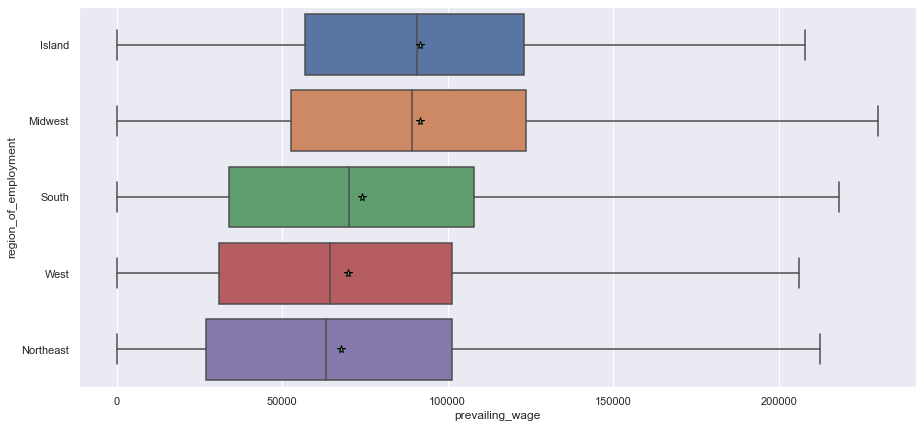

<IPython.core.display.Javascript object>

In [68]:
boxplot_categorical(df, "prevailing_wage", "region_of_employment", figure_size=(15, 7))

* The wage is higher in the Island and Midwest, around 90,000.
* The wage in the South is around 75,000.
* The wage in the West and Northeast is around 65,000.

## Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering 
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

## Outlier detection¶

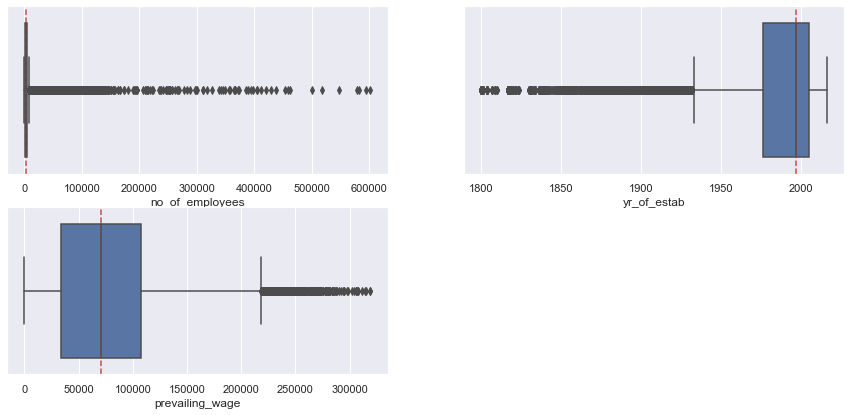

<IPython.core.display.Javascript object>

In [69]:
# Let's check the outliers there are outside 1.5 IQR (boxplot method )

# creating a list with the numeric variables
out_vars = df.select_dtypes(include="number").columns

# Let's plot the boxplot of the numerical features to check for outliers
# The median is the red line

plt.figure(figsize=(15, 40))

for i in range(len(out_vars)):
    plt.subplot(11, 2, i + 1)
    sns.boxplot(data=df, x=out_vars[i])
    plt.xlabel(out_vars[i])
    median = df[out_vars[i]].median()
    plt.axvline(median, color="r", linestyle="--")

* There are a lot of outliers in the number of employees, year of established and prevailing wage.
* This values seem to be real values, as we can have big companies with as much as 600,000 employees, companies that were established in 1800 and are still running, and prevailing wages as high as 300,000. For this reason we are not going to treat the oultiers.

## Model Building - Approach
1. Data preparation
2. Split the data into the train and test set.
3. Train models on the training data.
4. Try to improve the model performance using hyperparameter tuning.
5. Test the performance on the test data.

## Split Data

In [70]:
# defining the dependent variable
Y = df["case_status"]

# defining the independent variable
X = df.drop("case_status", axis=1)

# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,no_of_employees,yr_of_estab,prevailing_wage,continent_Asia,continent_Europe,continent_North America,continent_Oceania,continent_South America,education_of_employee_Doctorate,education_of_employee_High School,education_of_employee_Master's,has_job_experience_Y,requires_job_training_Y,region_of_employment_Midwest,region_of_employment_Northeast,region_of_employment_South,region_of_employment_West,unit_of_wage_Month,unit_of_wage_Week,unit_of_wage_Year,full_time_position_Y
0,14513,2007,592.2029,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
1,2412,2002,83425.6500,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1
2,44444,2008,122996.8600,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1
3,98,1897,83434.0300,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,1082,2005,149907.3900,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1


<IPython.core.display.Javascript object>

In [71]:
# Splitting data in train and test sets
# Use stratify=Y to keep the same proportion of classes in the target variable in both train and test set
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

<IPython.core.display.Javascript object>

In [72]:
# checking the proportion of the target and independent variables in the train and test set
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 21)
Shape of test set :  (7644, 21)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64


<IPython.core.display.Javascript object>

## Model evaluation criterion

### The model can make wrong predictions as:
1. Predicting as a Visa Certified when it is a Visa Denied - a False Positive.
2. Predicting as a Visa Denied when it is a Visa Certified - False Negative.

### Which case is more important? 
1. If the model predicts as a Visa Certified when it is a Visa Denied, the OFLC (Office of Foreign Labor Certification) will give a Visa for a foreign worker that shouldn't have it, failing to protect the US workers against adverse impacts on their wages or working conditions.
2. If the model predicts as a Visa Denied when it is a Visa Certified, the OFLC will deny a Visa for a foreigh worker that should have an approved Visa. The company/employer will loose a worker in a situation where there are not suficient US workers available to perform the work.


Both cases are important.

### Which metric to optimize?
* We would want `F1-Score` to be maximized, the greater the F1-Score higher the chances of predicting both the classes correctly (minimizing False Negatives and False Positives).

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot confusion matrix.

In [73]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable

    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

<IPython.core.display.Javascript object>

In [74]:
# defining a function to plot the confusion_matrix of a classification model


def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

<IPython.core.display.Javascript object>

## Building bagging and boosting models

- We'll fit different models on the train data and observe their performance. 
- We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
- We'll use GridSearchCv for hyperparameter tuning and `F1 score` to optimize the model.


- If the frequency of class 0 is 33% and the frequency of class 1 is 67%, then class 1 will become the dominant class and the decision tree will become biased toward the dominant classes.
- In this case, we can pass a dictionary {0:0.67, 1:0.33} to the model to specify the weight of each class and the model will give more weightage to class 0.
- When hyperparameter tuning we will use class weight whenever is possible.

## Bagging models and Bagging models with hyperparameters tuning

## Decision Tree Classifier

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0


Testing performance:
    Accuracy    Recall  Precision        F1
0  0.664835  0.742801   0.752232  0.747487


Confusion matrix on test set


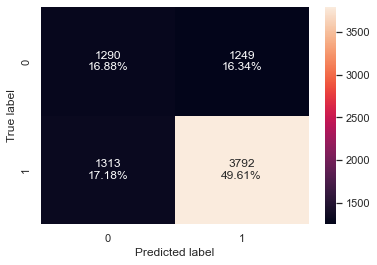

<IPython.core.display.Javascript object>

In [75]:
# Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train, y_train)

# Calculating different metrics in test and train set
d_tree_model_train_perf = model_performance_classification_sklearn(
    d_tree, X_train, y_train
)
print("Training performance:\n", d_tree_model_train_perf)
print("\n")
d_tree_model_test_perf = model_performance_classification_sklearn(
    d_tree, X_test, y_test
)
print("Testing performance:\n", d_tree_model_test_perf)
print("\n")

# Creating confusion matrix on test set
print("Confusion matrix on test set")
confusion_matrix_sklearn(d_tree, X_test, y_test)

* The decision tree is overfiting the training data.
* Let's try hyperparameter tuning and see if the model performance improves.

## Decision Tree Classifier with Hyperparameter Tuning

In [76]:
# Choose the type of classifier.
dtree_tuned = DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": list(np.arange(4, 30)) + [None],
    "min_samples_leaf": [1, 2, 5, 7, 10, 20],
    "max_leaf_nodes": [2, 3, 5, 10, 15] + [None],
    "min_impurity_decrease": [0.0001, 0.001, 0.01, 0.1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
# n_jobs : -1 means using all processors.

grid_obj = GridSearchCV(dtree_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)


# Set the clf to the best combination of parameters
dtree_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
dtree_tuned.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=4,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411


Testing performance:
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


Confusion matrix on test set


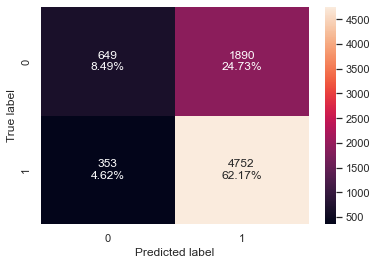

<IPython.core.display.Javascript object>

In [77]:
# Calculating different metrics in test and train set

dtree_tuned_model_train_perf = model_performance_classification_sklearn(
    dtree_tuned, X_train, y_train
)
print("Training performance:\n", dtree_tuned_model_train_perf)
print("\n")
dtree_tuned_model_test_perf = model_performance_classification_sklearn(
    dtree_tuned, X_test, y_test
)
print("Testing performance:\n", dtree_tuned_model_test_perf)
print("\n")

# Creating confusion matrix on test set
print("Confusion matrix on test set")
confusion_matrix_sklearn(dtree_tuned, X_test, y_test)

* The decision tree with tuning is giving a generalized performance.
* All the metrics have increased compared to the decision tree.  The F1_score has a good value.

#### Visualizing the Decision Tree Tuned

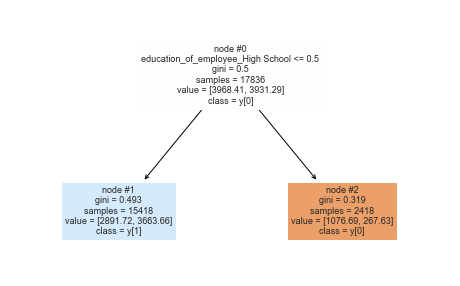

<IPython.core.display.Javascript object>

In [78]:
## creating a list of column names
feature_names = X_train.columns.to_list()

plt.figure(figsize=(8, 5))

out = tree.plot_tree(
   dtree_tuned,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


#### Plotting the feature importance of each variable

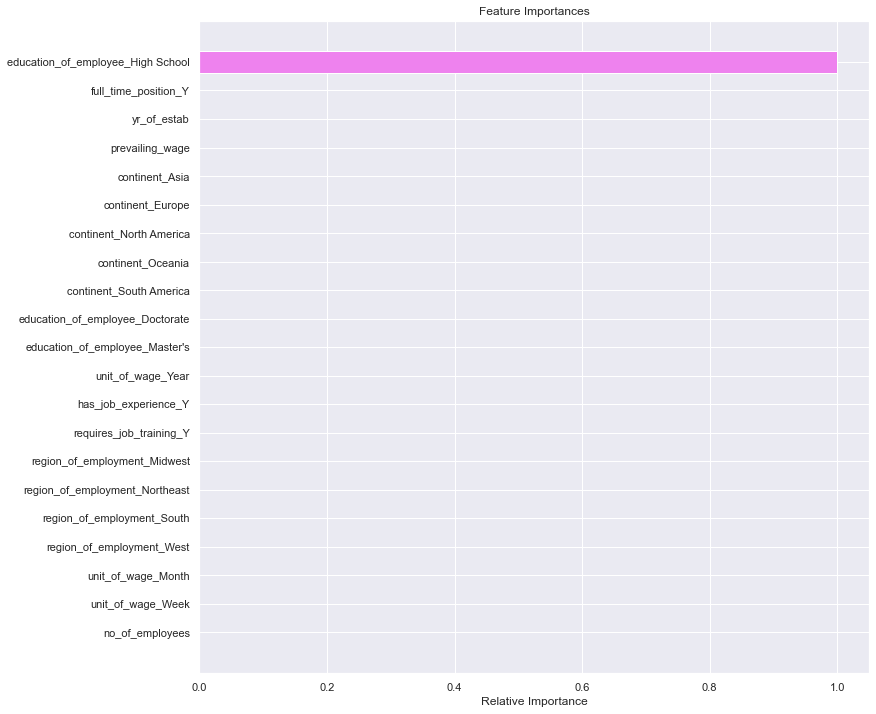

<IPython.core.display.Javascript object>

In [79]:
# visualizing the importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

feature_names = X_train.columns
importances = dtree_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* We have a tuned decision tree that is too simple, with only one important feature, education_of_employee_High School.
* This model doesn't give us much insight on the variables that have a significant influence on case status.

## Random Forest Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999944  0.999916        1.0  0.999958


Testing performance:
    Accuracy    Recall  Precision        F1
0  0.720827  0.832125   0.768869  0.799247


Confusion matrix on test set


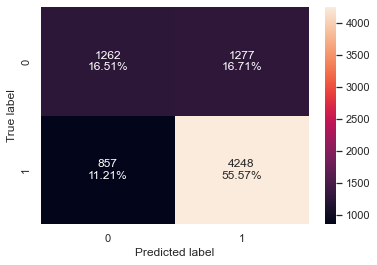

<IPython.core.display.Javascript object>

In [80]:
# Fitting the model
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(X_train, y_train)

# Calculating different metrics in test and train set
rf_estimator_model_train_perf = model_performance_classification_sklearn(
    rf_estimator, X_train, y_train
)
print("Training performance:\n", rf_estimator_model_train_perf)
print("\n")
rf_estimator_model_test_perf = model_performance_classification_sklearn(
    rf_estimator, X_test, y_test
)
print("Testing performance:\n", rf_estimator_model_test_perf)
print("\n")

# Creating confusion matrix on test set
print("Confusion matrix on test set")
confusion_matrix_sklearn(rf_estimator, X_test, y_test)

* The random forest model is overffiting the training set.
* Let's try hyperparameter tuning and see if the model performance improves.

## Random Forest Classifier Whith Hyperparameter Tuning

In [81]:
# Choose the type of classifier.
rf_tuned = RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)

parameters = {
    "n_estimators": np.arange(10, 60, 10),
    "max_depth": list(np.arange(4, 15, 4)),
    "max_features": ["sqrt", "log2"],
    "min_samples_split": np.arange(2, 15, 5),
}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.67, 1: 0.33}, max_depth=12,
                       max_features='sqrt', n_estimators=50, random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0   0.80203  0.834634   0.864308  0.849212


Testing performance:
    Accuracy    Recall  Precision        F1
0  0.728414  0.784721   0.803933  0.794211


Confusion matrix on test set


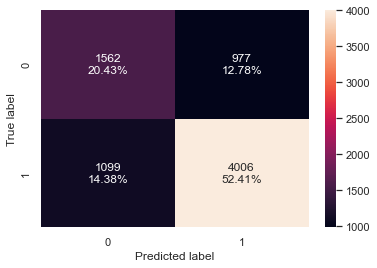

<IPython.core.display.Javascript object>

In [82]:
# Calculating different metrics in test and train set
rf_tuned_model_train_perf = model_performance_classification_sklearn(
    rf_tuned, X_train, y_train
)
print("Training performance:\n", rf_tuned_model_train_perf)
print("\n")
rf_tuned_model_test_perf = model_performance_classification_sklearn(
    rf_tuned, X_test, y_test
)
print("Testing performance:\n", rf_tuned_model_test_perf)
print("\n")

# Creating confusion matrix on test set
print("Confusion matrix on test set")
confusion_matrix_sklearn(rf_tuned, X_test, y_test)

* The random forest tuned model has reduced the overfitting.
* The F1 score is the same as before the hyperparameter tuning.
* There is good balance between Precision and Recall.

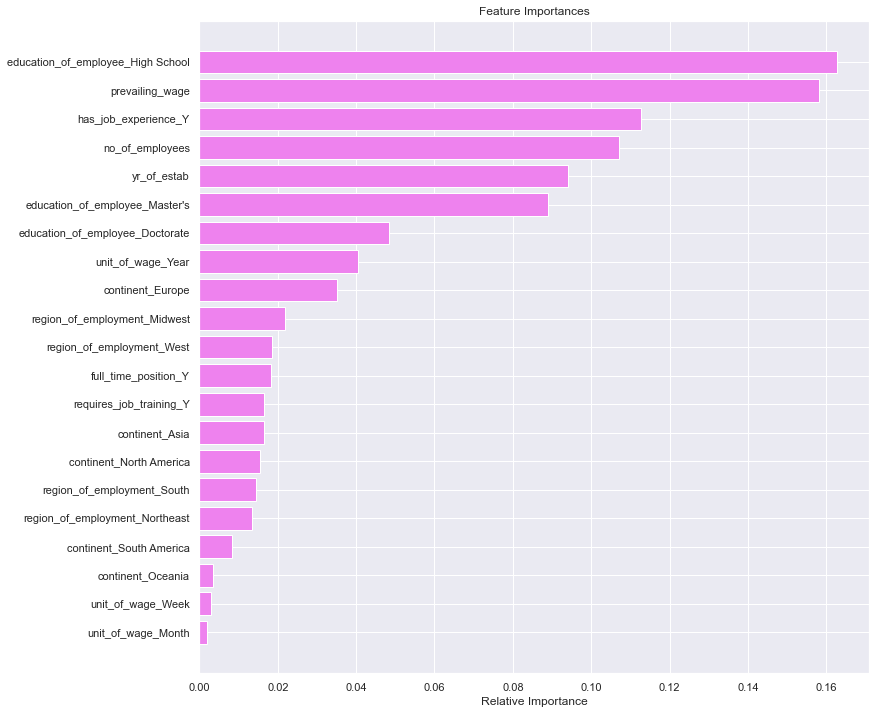

<IPython.core.display.Javascript object>

In [83]:
# visualizing the importance of features in the tree building
feature_names = X_train.columns
importances = rf_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The most important feature is education_of_employee_High_School, followed by prevailing_wage and has_job_experience_Y in the Random Forest Tuned model.

## Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.985198  0.985982    0.99181  0.988887


Testing performance:
    Accuracy    Recall  Precision        F1
0  0.691523  0.764153   0.771711  0.767913


Confusion matrix on test set


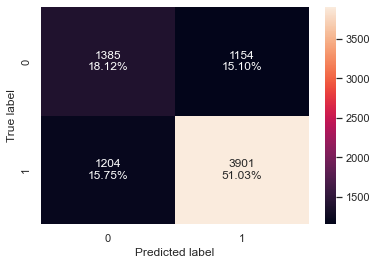

<IPython.core.display.Javascript object>

In [84]:
# Fitting the model
bagging_classifier = BaggingClassifier(random_state=1)
bagging_classifier.fit(X_train, y_train)

# Calculating different metrics in train and test set
bagging_classifier_model_train_perf = model_performance_classification_sklearn(
    bagging_classifier, X_train, y_train
)
print("Training performance:\n", bagging_classifier_model_train_perf)
print("\n")
bagging_classifier_model_test_perf = model_performance_classification_sklearn(
    bagging_classifier, X_test, y_test
)
print("Testing performance:\n", bagging_classifier_model_test_perf)
print("\n")

# Creating confusion matrix on test set
print("Confusion matrix on test set")
confusion_matrix_sklearn(bagging_classifier, X_test, y_test)

* The bagging classifier is overfitting the training set.
* The F1 score in test set is lower than almost all the models until now, except the decision tree.
* Let's try hyperparameter tuning and see if the model performance improves.

## Bagging Classifier with Hyperparameter Tuning

In [85]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'n_estimators': np.arange(50, 130, 10), 
              'max_samples': [0.5, 0.6, 0.7, 0.8], 
              'max_features': [0.5, 0.6, 0.7, 0.8],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)


BaggingClassifier(max_features=0.7, max_samples=0.6, n_estimators=90,
                  random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.985703  0.999412   0.979595  0.989405


Testing performance:
    Accuracy    Recall  Precision        F1
0  0.723967  0.890695   0.745532  0.811674


Confusion matrix on test set


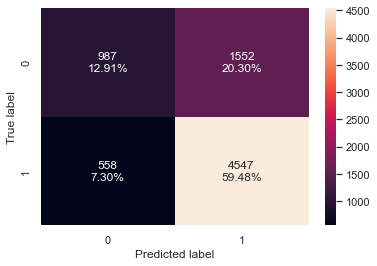

<IPython.core.display.Javascript object>

In [86]:
# Calculating different metrics in train and test set
bagging_estimator_tuned_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_train, y_train
)
print("Training performance:\n", bagging_estimator_tuned_model_train_perf)
print("\n")
bagging_estimator_tuned_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned, X_test, y_test
)
print("Testing performance:\n", bagging_estimator_tuned_model_test_perf)
print("\n")

# Creating confusion matrix on test set
print("Confusion matrix on test set")
confusion_matrix_sklearn(bagging_estimator_tuned, X_test, y_test)

* The bagging classifier tuned is overfitting the training set.
* Let's try a bagging classifier tuned wiht class weight.

In [87]:
# grid search for bagging classifier
cl1 = DecisionTreeClassifier(class_weight={0: 0.67, 1: 0.33}, random_state=1)
parameters = {
    "base_estimator": [cl1],
    "n_estimators": np.arange(50, 130, 10),
    "max_samples": [0.5, 0.6, 0.7, 0.8],
    "max_features": [0.5, 0.6, 0.7, 0.8],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

grid_obj = GridSearchCV(
    BaggingClassifier(random_state=1), parameters, scoring=scorer, cv=5, n_jobs=-1
)
grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned_weight = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned_weight.fit(X_train, y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                      1: 0.33},
                                                        random_state=1),
                  max_features=0.7, max_samples=0.5, n_estimators=120,
                  random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.969276  0.998153   0.957639  0.977476


Testing performance:
    Accuracy   Recall  Precision        F1
0  0.730115  0.90049   0.747237  0.816736


Confusion matrix on test set


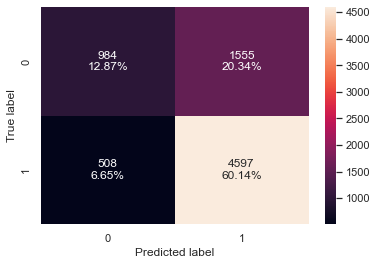

<IPython.core.display.Javascript object>

In [88]:
# Calculating different metrics in train and test set
bagging_estimator_tuned_weight_model_train_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned_weight, X_train, y_train
)
print("Training performance:\n", bagging_estimator_tuned_weight_model_train_perf)
print("\n")
bagging_estimator_tuned_weight_model_test_perf = model_performance_classification_sklearn(
    bagging_estimator_tuned_weight, X_test, y_test
)
print("Testing performance:\n", bagging_estimator_tuned_weight_model_test_perf)
print("\n")

# Creating confusion matrix on test set
print("Confusion matrix on test set")
confusion_matrix_sklearn(bagging_estimator_tuned_weight, X_test, y_test)

* The bagging estimator tuned weight is giving a similar performance as the bagging estimator tuned, still overfitting the training set.

## Boosting models and Boosting models with hyperparameters tuning

## AdaBoost Classifier

Training performance:
    Accuracy    Recall  Precision       F1
0  0.738226  0.887182   0.760688  0.81908


Testing performance:
    Accuracy    Recall  Precision        F1
0  0.734301  0.885015   0.757799  0.816481


Confusion matrix on test set


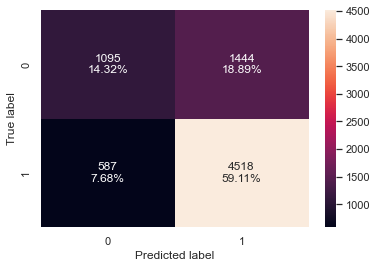

<IPython.core.display.Javascript object>

In [89]:
# Fitting the model
ab_classifier = AdaBoostClassifier(random_state=1)
ab_classifier.fit(X_train, y_train)

# Calculating different metrics in train and test set
ab_classifier_model_train_perf = model_performance_classification_sklearn(
    ab_classifier, X_train, y_train
)
print("Training performance:\n", ab_classifier_model_train_perf)
print("\n")
ab_classifier_model_test_perf = model_performance_classification_sklearn(
    ab_classifier, X_test, y_test
)
print("Testing performance:\n", ab_classifier_model_test_perf)
print("\n")

# Creating confusion matrix on test set
print("Confusion matrix on test set")
confusion_matrix_sklearn(ab_classifier, X_test, y_test)

* The AdaBoost model is giving a generalized performance on training and test set.
* The F1 score has a good value.
* Let's try hyperparameter tuning and see if we can improve more the model performance.

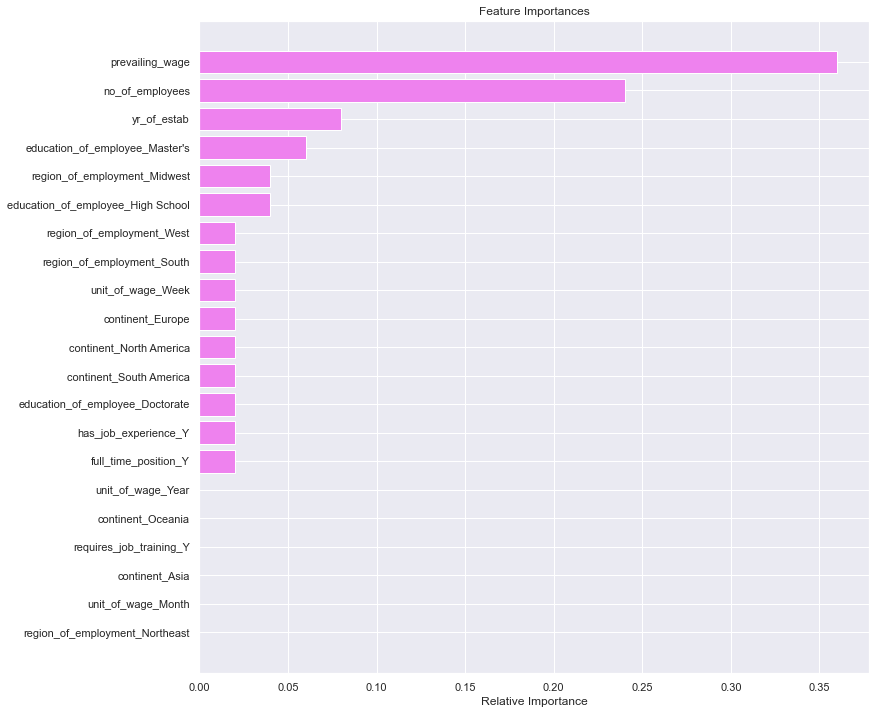

<IPython.core.display.Javascript object>

In [90]:
# visualizing importance of features in the tree building
feature_names = X_train.columns
importances = ab_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The most important feature in AdaBoost classifier is prevailing_wage, followed by no_of_employees and yr_of_estab.

## AdaBoost Classifier with Hyperparameter Tuning

In [91]:
# Choose the type of classifier.
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    # Let's try different max_depth for base_estimator
    "base_estimator": [
        DecisionTreeClassifier(
            max_depth=1, random_state=1, class_weight={0: 0.67, 1: 0.33}
        ),
        DecisionTreeClassifier(
            max_depth=2, random_state=1, class_weight={0: 0.67, 1: 0.33}
        ),
    ],
    "n_estimators": np.arange(70, 130, 10),
    "learning_rate": np.arange(0.1, 1, 0.1),
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(class_weight={0: 0.67,
                                                                       1: 0.33},
                                                         max_depth=1,
                                                         random_state=1),
                   learning_rate=0.1, n_estimators=110, random_state=1)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.719107  0.781247   0.794723  0.787928


Testing performance:
    Accuracy    Recall  Precision        F1
0  0.716771  0.781587   0.791667  0.786594


Confusion matrix on test set


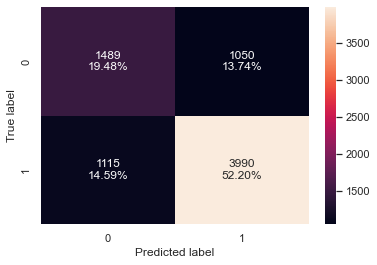

<IPython.core.display.Javascript object>

In [92]:
# Calculating different metrics in train and test set
abc_tuned_model_train_perf = model_performance_classification_sklearn(
    abc_tuned, X_train, y_train
)
print("Training performance:\n", abc_tuned_model_train_perf)
print("\n")
abc_tuned_model_test_perf = model_performance_classification_sklearn(
    abc_tuned, X_test, y_test
)
print("Testing performance:\n", abc_tuned_model_test_perf)
print("\n")

# Creating confusion matrix on test set
print("Confusion matrix on test set")
confusion_matrix_sklearn(abc_tuned, X_test, y_test)

* AdaBoost tuning is giving a generalized performance on train and test set.
* Recall, Precision and F1 score are well balanced in this model.
* Exept for Precision, all the metrics are lower than the AdaBoost without tuning.

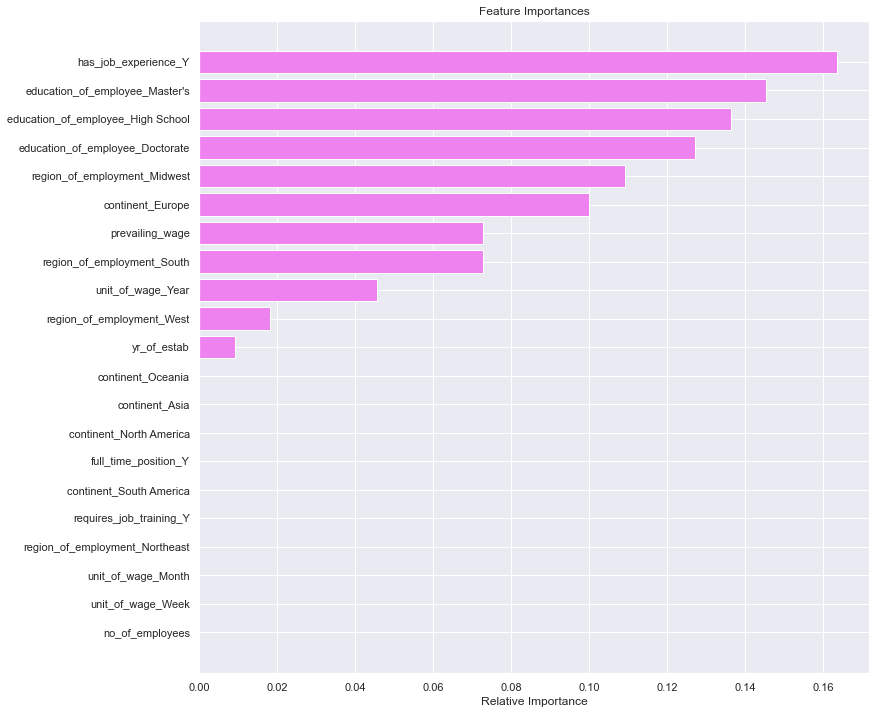

<IPython.core.display.Javascript object>

In [93]:
# visualizing importance of features in the tree building
feature_names = X_train.columns
importances = abc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The most important feature in AdaBoost tuned is has_job_experience_Y,  followed by education_of_employee_Master's and education_of_employee_High_School.

## Gradient Boosting Classifier

Training performance:
    Accuracy   Recall  Precision        F1
0  0.758802  0.88374   0.783042  0.830349


Testing performance:
    Accuracy    Recall  Precision        F1
0  0.744767  0.876004   0.772366  0.820927


Confusion matrix on test set


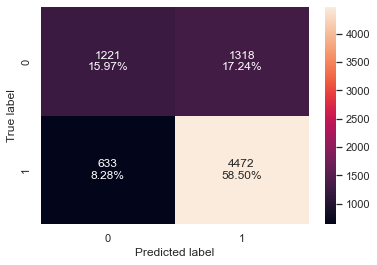

<IPython.core.display.Javascript object>

In [94]:
# Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train, y_train)

# Calculating different metrics in train and test set
gb_classifier_model_train_perf = model_performance_classification_sklearn(
    gb_classifier, X_train, y_train
)
print("Training performance:\n", gb_classifier_model_train_perf)
print("\n")
gb_classifier_model_test_perf = model_performance_classification_sklearn(
    gb_classifier, X_test, y_test
)
print("Testing performance:\n", gb_classifier_model_test_perf)
print("\n")

# Creating confusion matrix on test set
print("Confusion matrix on test set")
confusion_matrix_sklearn(gb_classifier, X_test, y_test)

* GradientBoosting classifier is giving a generalized performance in train and test set.
* The F1 score is the highest seen, until now.
* Let's try hyperparameter tuning and see if we can improve more the model performance.

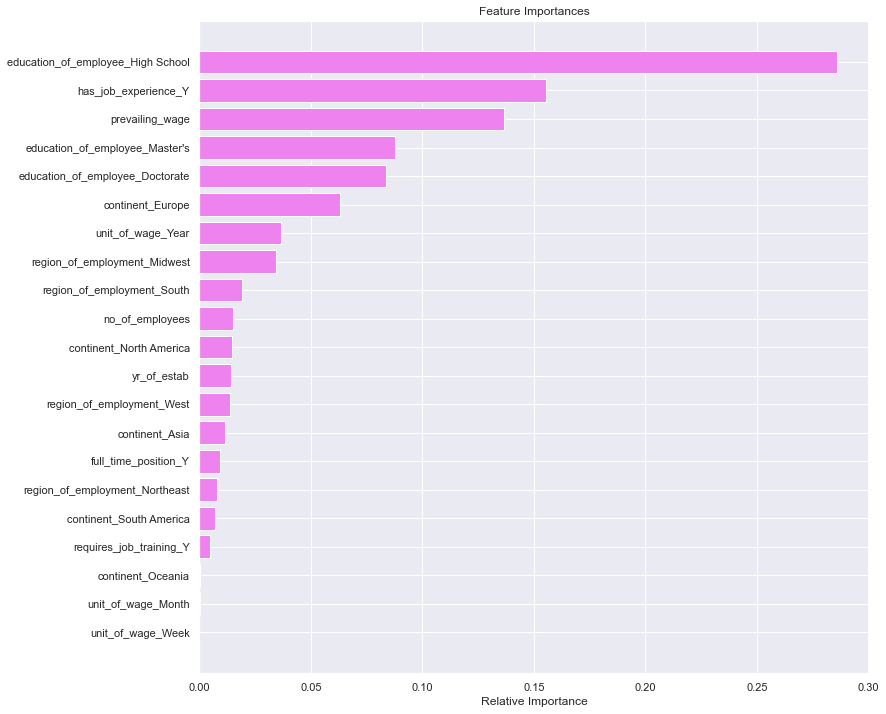

<IPython.core.display.Javascript object>

In [95]:
# visualizing importance of features in the tree building
feature_names = X_train.columns
importances = gb_classifier.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The most important features in the Gradient Boosting model are education_of_employee_High School, has_job_experience_Y and prevailing_wage respectively.

## Gradient Boosting Classifier with Hyperparameter Tuning

In [96]:
# Choose the type of classifier.
gbc_tuned = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1), random_state=1
)

# Grid of parameters to choose from
parameters = {
    "learning_rate": [0.04, 0.05, 0.06],
    "n_estimators": [150, 200, 250],
    "subsample": [0.8, 0.9, 1],
    "max_features": [0.8, 0.9, 1],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.04, max_features=0.9,
                           n_estimators=200, random_state=1, subsample=0.8)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.757233  0.882649   0.781959  0.829259


Testing performance:
    Accuracy   Recall  Precision        F1
0  0.744375  0.87522   0.772342  0.820569


Confusion matrix on test set


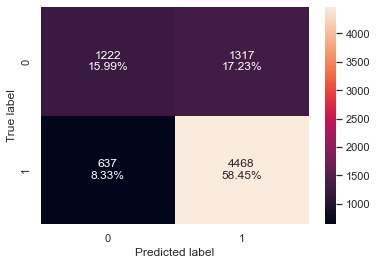

<IPython.core.display.Javascript object>

In [97]:
# Calculating different metrics in train and test set
gbc_tuned_model_train_perf = model_performance_classification_sklearn(
    gbc_tuned, X_train, y_train
)
print("Training performance:\n", gbc_tuned_model_train_perf)
print("\n")
gbc_tuned_model_test_perf = model_performance_classification_sklearn(
    gbc_tuned, X_test, y_test
)
print("Testing performance:\n", gbc_tuned_model_test_perf)
print("\n")

# Creating confusion matrix on test set
print("Confusion matrix on test set")
confusion_matrix_sklearn(gbc_tuned, X_test, y_test)

* The GradientBoosting tuned is generalizing well but giving the same performance as the GradientBoosting model without tuning.

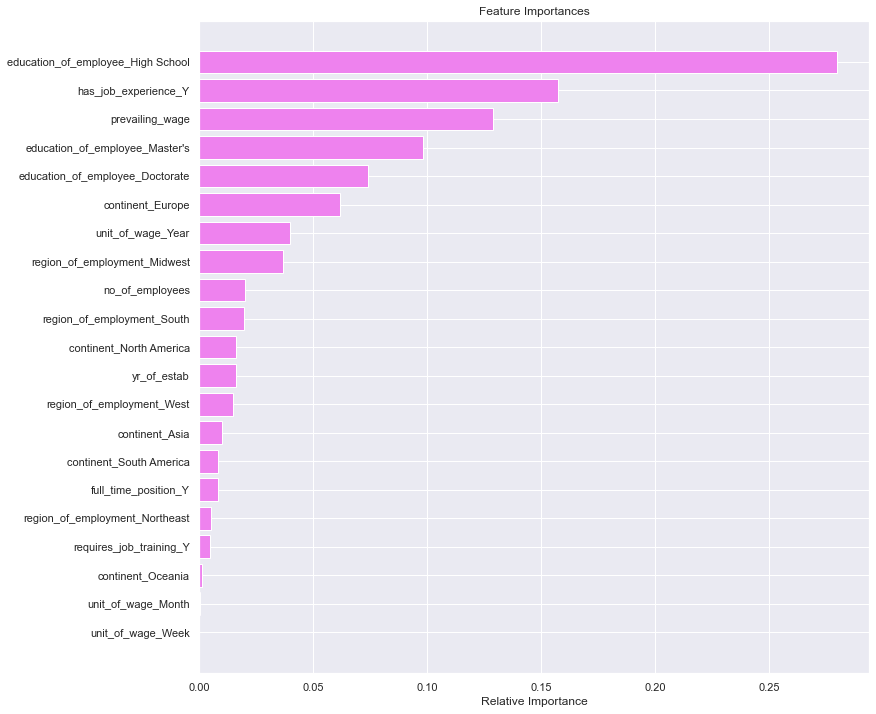

<IPython.core.display.Javascript object>

In [98]:
# visualizing importance of features in the tree building
feature_names = X_train.columns
importances = gbc_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The most important features in the Gradient Boosting tuned model are education_of_employee_High School, has_job_experience_Y and prevailing_wage respectively. They are the same as the Gradient Boosting model without tuning.

## XGBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.838753  0.931419   0.843482  0.885272


Testing performance:
    Accuracy    Recall  Precision        F1
0  0.733255  0.860725   0.767913  0.811675


Confusion matrix on test set


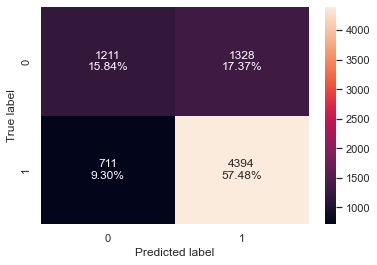

<IPython.core.display.Javascript object>

In [99]:
# Fitting the model
xgb_classifier = XGBClassifier(
    random_state=1, eval_metric="logloss", use_label_encoder=False
)
xgb_classifier.fit(X_train, y_train)

# Calculating different metrics in train and test set
xgb_classifier_model_train_perf = model_performance_classification_sklearn(
    xgb_classifier, X_train, y_train
)
print("Training performance:\n", xgb_classifier_model_train_perf)
print("\n")
xgb_classifier_model_test_perf = model_performance_classification_sklearn(
    xgb_classifier, X_test, y_test
)
print("Testing performance:\n", xgb_classifier_model_test_perf)
print("\n")

# Creating confusion matrix on test set
print("Confusion matrix on test set")
confusion_matrix_sklearn(xgb_classifier, X_test, y_test)

* The XGBoost model is overfitting a little the training set.
* Let's try hyperparameter tuning and see if the model performance improve.

## XGBoost Classifier with Hyperparameter Tuning

In [100]:
# Choose the type of classifier.
xgb_tuned = XGBClassifier(
    random_state=1, eval_metric="logloss", use_label_encoder=False
)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [50, 60],
    "learning_rate": [0.1, 0.11, 0.12],
    "scale_pos_weight": [1, 2, 3],
    "subsample": [0.95, 1],
    "colsample_bytree": [0.6, 0.7],
    "colsample_bylevel": [0.6, 0.7],
    "gamma": [4, 5],
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters, scoring=scorer, cv=5, n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
              colsample_bynode=1, colsample_bytree=0.6,
              enable_categorical=False, eval_metric='logloss', gamma=5,
              gpu_id=-1, importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=50, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=1, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.761157  0.886007    0.78435  0.832085


Testing performance:
    Accuracy    Recall  Precision       F1
0  0.749477  0.880313   0.775095  0.82436


Confusion matrix on test set


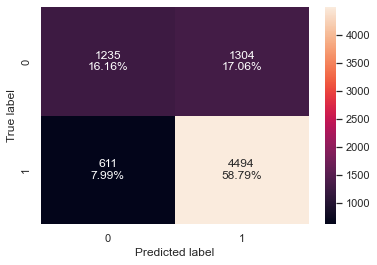

<IPython.core.display.Javascript object>

In [101]:
# Calculating different metrics in train and test set
xgb_tuned_model_train_perf = model_performance_classification_sklearn(
    xgb_tuned, X_train, y_train
)
print("Training performance:\n", xgb_tuned_model_train_perf)
print("\n")
xgb_tuned_model_test_perf = model_performance_classification_sklearn(
    xgb_tuned, X_test, y_test
)
print("Testing performance:\n", xgb_tuned_model_test_perf)
print("\n")

# Creating confusion matrix on test set
print("Confusion matrix on test set")
confusion_matrix_sklearn(xgb_tuned, X_test, y_test)

* The XGBoost tuned model is generalizing well on train and test set.
* The F1 Score is the highest seen so far.

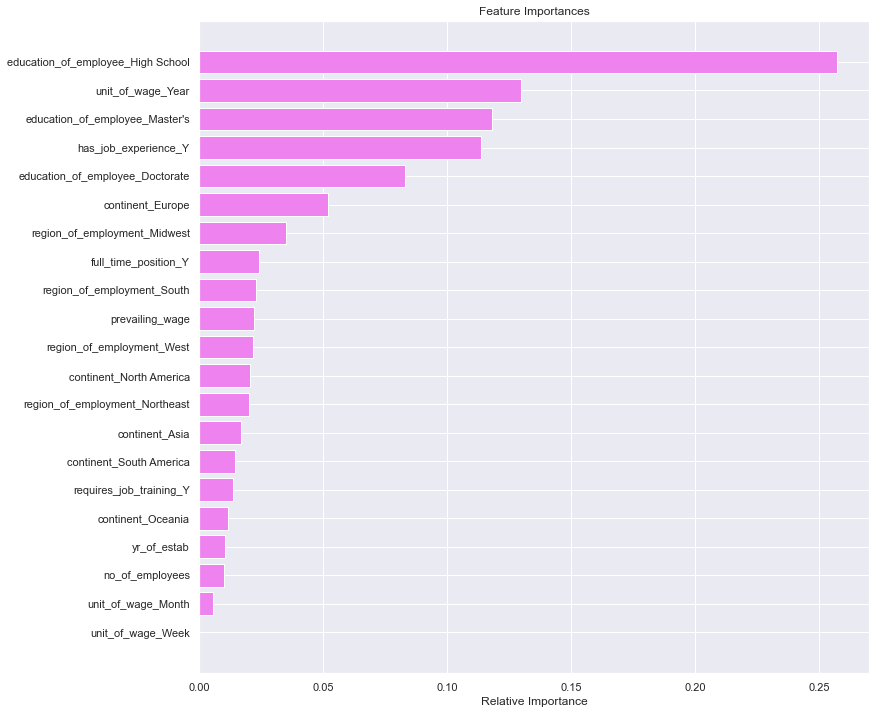

<IPython.core.display.Javascript object>

In [102]:
# visualizing importance of features in the tree building
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The most important feature in XGBoost tuned model is education_of_employee_High School, followed by unit_of_wage_Year and education_of_employee_Master's.

## Stacking Classifier

In [103]:
# Our best model so far is the XGBoost Classifier Tuned. This is goint to be our final estimator in the stacking classifier.
# We are going to choose other 3 different models to be the estimators in the stacking classifier.
# Other models that have a good performance are the Gradient Boost Classifier, the AdaBoost Classifier and
# the Decision Tree Tuned.

estimators = [
    ("Gradient Boost", gb_classifier),
    ("AdaBoost", ab_classifier),
    ("Decision Tree Tuned", dtree_tuned),
]

final_estimator = xgb_tuned

stacking_classifier = StackingClassifier(
    estimators=estimators, final_estimator=final_estimator
)

stacking_classifier.fit(X_train, y_train)

StackingClassifier(estimators=[('Gradient Boost',
                                GradientBoostingClassifier(random_state=1)),
                               ('AdaBoost', AdaBoostClassifier(random_state=1)),
                               ('Decision Tree Tuned',
                                DecisionTreeClassifier(class_weight={0: 0.67,
                                                                     1: 0.33},
                                                       max_depth=4,
                                                       max_leaf_nodes=2,
                                                       min_impurity_decrease=0.0001,
                                                       random_state=1))],
                   final_estimator=XGBClassifier(base_score=0.5,
                                                 booster='gbtree'...
                                                 importance_type=None,
                                                 interaction_constraints=''

<IPython.core.display.Javascript object>

Training performance:
    Accuracy    Recall  Precision        F1
0  0.753756  0.878116   0.780613  0.826499


Testing performance:
    Accuracy    Recall  Precision        F1
0  0.739927  0.870127   0.770244  0.817145


Confusion matrix on test set


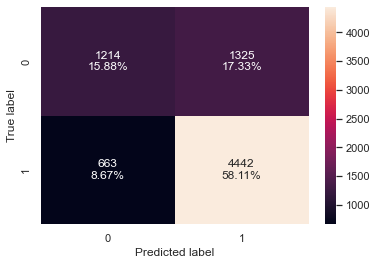

<IPython.core.display.Javascript object>

In [104]:
# Calculating different metrics in train and test set
stacking_classifier_model_train_perf = model_performance_classification_sklearn(
    stacking_classifier, X_train, y_train
)
print("Training performance:\n", stacking_classifier_model_train_perf)
print("\n")
stacking_classifier_model_test_perf = model_performance_classification_sklearn(
    stacking_classifier, X_test, y_test
)
print("Testing performance:\n", stacking_classifier_model_test_perf)
print("\n")

# Creating confusion matrix on test set
print("Confusion matrix on test set")
confusion_matrix_sklearn(stacking_classifier, X_test, y_test)

* The Stacking Classifier is generalizing well in the train and test set.

## Model Performance Comparison and Conclusions

In [105]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        d_tree_model_train_perf.T,
        dtree_tuned_model_train_perf.T,
        rf_estimator_model_train_perf.T,
        rf_tuned_model_train_perf.T,
        bagging_classifier_model_train_perf.T,
        bagging_estimator_tuned_model_train_perf.T,
        bagging_estimator_tuned_weight_model_train_perf.T,
        ab_classifier_model_train_perf.T,
        abc_tuned_model_train_perf.T,
        gb_classifier_model_train_perf.T,
        gbc_tuned_model_train_perf.T,
        xgb_classifier_model_train_perf.T,
        xgb_tuned_model_train_perf.T,
        stacking_classifier_model_train_perf.T,
    ],
    axis=1,
)

models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Bagging Estimator Tuned Weight",
    "AdaBoost Classifier",
    "AdaBoost Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Bagging Estimator Tuned Weight,AdaBoost Classifier,AdaBoost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.999944,0.802030,0.985198,0.985703,0.969276,0.738226,0.719107,0.758802,0.757233,0.838753,0.761157,0.753756
Recall,1.0,0.931923,0.999916,0.834634,0.985982,0.999412,0.998153,0.887182,0.781247,0.883740,0.882649,0.931419,0.886007,0.878116
Precision,1.0,0.720067,1.000000,0.864308,0.991810,0.979595,0.957639,0.760688,0.794723,0.783042,0.781959,0.843482,0.784350,0.780613
F1,1.0,0.812411,0.999958,0.849212,0.988887,0.989405,0.977476,0.819080,0.787928,0.830349,0.829259,0.885272,0.832085,0.826499


<IPython.core.display.Javascript object>

In [106]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        d_tree_model_test_perf.T,
        dtree_tuned_model_test_perf.T,
        rf_estimator_model_test_perf.T,
        rf_tuned_model_test_perf.T,
        bagging_classifier_model_test_perf.T,
        bagging_estimator_tuned_model_test_perf.T,
        bagging_estimator_tuned_weight_model_test_perf.T,
        ab_classifier_model_test_perf.T,
        abc_tuned_model_test_perf.T,
        gb_classifier_model_test_perf.T,
        gbc_tuned_model_test_perf.T,
        xgb_classifier_model_test_perf.T,
        xgb_tuned_model_test_perf.T,
        stacking_classifier_model_test_perf.T,
    ],
    axis=1,
)

models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest Estimator",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Bagging Estimator Tuned Weight",
    "AdaBoost Classifier",
    "AdaBoost Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier",
]

print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest Estimator,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Bagging Estimator Tuned Weight,AdaBoost Classifier,AdaBoost Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.664835,0.706567,0.720827,0.728414,0.691523,0.723967,0.730115,0.734301,0.716771,0.744767,0.744375,0.733255,0.749477,0.739927
Recall,0.742801,0.930852,0.832125,0.784721,0.764153,0.890695,0.900490,0.885015,0.781587,0.876004,0.875220,0.860725,0.880313,0.870127
Precision,0.752232,0.715447,0.768869,0.803933,0.771711,0.745532,0.747237,0.757799,0.791667,0.772366,0.772342,0.767913,0.775095,0.770244
F1,0.747487,0.809058,0.799247,0.794211,0.767913,0.811674,0.816736,0.816481,0.786594,0.820927,0.820569,0.811675,0.824360,0.817145


<IPython.core.display.Javascript object>

* The XGBoost Classifier Tuned is giving the highest F1 Score and a generalized performance. This is our best model.


* There are other good models as Gradient Boost Classifier, Gradient Boos Classifier Tuned, Stacking Classifier and AdaBoost Classifier. 
* The models with high F1 Score have higher Recall than Precision, which means our models are better at idenfying the Certified Visas.
* There are two models, Random Forest Tuned and AdaBoost Classifier Tuned, that are giving a good balance between Precision and Recall, but the F1 Score is the lowest of our models.
* The models that are overfitting the train test are Decison Tree, Random Forest Esimator, Bagging Classifier, Bagging Estimator Tuned, Bagging Estimator Tuned Weight. This are not good models.

## Feature importance of XGBoost Classifier Tuned

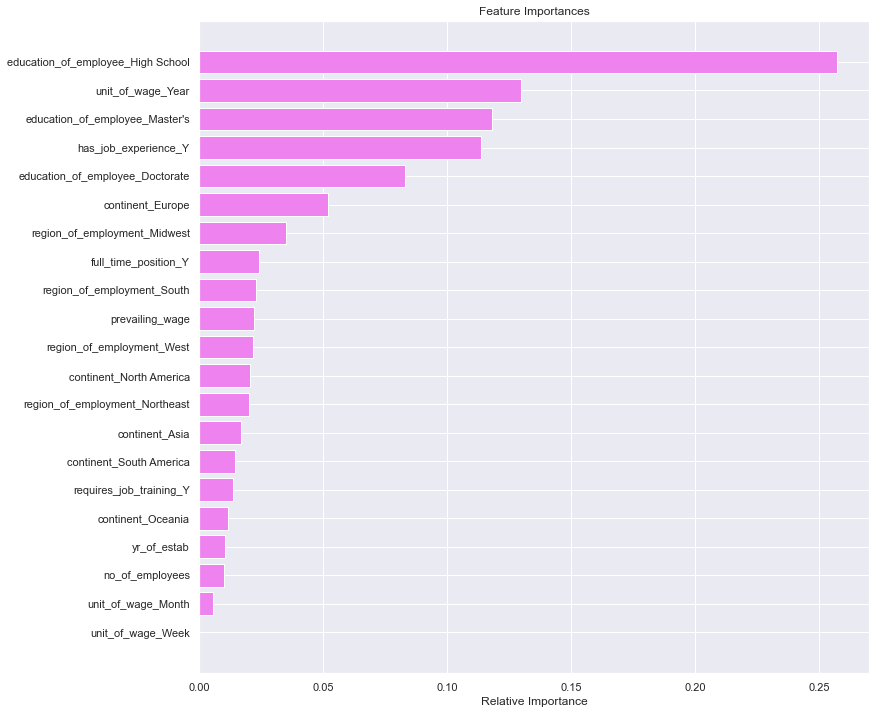

<IPython.core.display.Javascript object>

In [107]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* The most important feature in identifying the applicants that have a Visa Certified is education_of_employee_High School, followed by unit_of_wage_Year and education_of_employee_Master's.

## Actionable Insights and Recommendations

* We can use the classification model XGBoost Tuned to predict the applicants that will have a Visa Certified or Denied. This can help the Office for Foreing Labor Certification (OFLC) to turn the process of reviewing the applications more agile, as they can find who are the candidates with higher chances of Visa Approval.
* We can see from our model that the features that have significant influence in the case status are the education of the employee (High School, Master's and Doctorate), the unit of wage (Year), the job experience (yes), the continent (Europe) and the region of employment (Midwest).
* From our exploratory data analysis and the model important features we can create a profile for the applicants:
    * If the applicant has only High School the Visa is most likely to be Denied.
    * If the applicant has a Master's or a Doctorate the Visa is most likely to be Certified.
    * If the unit of wage is Year the Visa is most likely to be Certified.
    * If the unit of wage is Hour the Visa is most likely to be Denied.
    * If the applicant has job experience the Visa is most likely to be Certified.
    * If the applicant does not have job experience the Visa is less likely to be Certified.
    * If the applicant is from Europe or Africa the Visa is most likely to be Certified.
    * If the applicant is from South America the Visa is less likely to be Certified.
    * If the applicant's region of employment is Midwest or South the Visa is most likely to be Certified.

    